In [43]:
import NO_utils_multiple
import NO_utils
import os
import csv
import time
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime

## Load and visualize data

In [2]:
# Load and extract data
# Define paths for both datasets
datafolder1_name = ["data", "set 1"]
datafolder2_name = ["data", "set 2"]

data_path1 = os.path.join(*datafolder1_name)
data_path2 = os.path.join(*datafolder2_name)

# Helper function to load and process a dataset
def load_and_process_dataset(data_path, print_dataset=True):
    start_time = time.time()
    (designs, design_params, n_designs, n_panes, design_res,
     WAVEVECTOR_DATA, WAVEFORM_DATA, n_dim, n_wavevectors,
     EIGENVALUE_DATA, n_bands, EIGENVECTOR_DATA_x,
     EIGENVECTOR_DATA_y, const, N_struct,
     imag_tol, rng_seed_offset) = NO_utils.extract_data(data_path)

    print(f"Loading dataset path: {data_path}")

    # Convert all bands to spatial domain
    bands = np.arange(1, n_bands + 1)
    bands_fft = np.zeros((n_bands, design_res, design_res))
    for i, band in enumerate(bands):
        bands_fft[i], _ = NO_utils_multiple.const_to_spatial(band, design_res, plot_result=False, scaling_factor=1.0)

    # Create the result dictionary
    dataset = {
        "designs": designs, "design_params": design_params, "n_designs": n_designs,
        "WAVEVECTOR_DATA": WAVEVECTOR_DATA, "WAVEFORM_DATA": WAVEFORM_DATA,
        "EIGENVALUE_DATA": EIGENVALUE_DATA, "EIGENVECTOR_DATA_x": EIGENVECTOR_DATA_x,
        "EIGENVECTOR_DATA_y": EIGENVECTOR_DATA_y, "bands_fft": bands_fft
    }
    
    # Stop the timer
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print dataset sizes and elapsed time
    if print_dataset:
        print(f"Dataset loaded from {data_path}:")
        for key, value in dataset.items():
            print(f"  {key}: {np.shape(value)}")
        print(f"Elapsed time: {elapsed_time:.2f} seconds")
    
    return dataset

# Load and process datasets
dataset1 = load_and_process_dataset(data_path1)

designs = dataset1["designs"]
design_params = dataset1["design_params"]
waveforms = dataset1["WAVEFORM_DATA"]
eigenvalue_data = dataset1["EIGENVALUE_DATA"]
eigenvector_data_x = dataset1["EIGENVECTOR_DATA_x"]
eigenvector_data_y = dataset1["EIGENVECTOR_DATA_y"]
bands_fft = dataset1["bands_fft"]
print("Dataset 1 loaded and saved.")
# Free up memory by deleting dataset1
del dataset1

dataset2 = load_and_process_dataset(data_path2)

designs = np.concatenate([designs, dataset2["designs"]], axis=0)
design_params = np.concatenate([design_params, dataset2["design_params"]], axis=0)
waveforms = np.concatenate([waveforms, dataset2["WAVEFORM_DATA"]], axis=0)
eigenvalue_data = np.concatenate([eigenvalue_data, dataset2["EIGENVALUE_DATA"]], axis=0)
eigenvector_data_x = np.concatenate([eigenvector_data_x, dataset2["EIGENVECTOR_DATA_x"]], axis=0)
eigenvector_data_y = np.concatenate([eigenvector_data_y, dataset2["EIGENVECTOR_DATA_y"]], axis=0)
# bands_ftt should be the same for each dataset

# Free up memory by deleting dataset2
del dataset2

#Take unique subset of waveforms    
waveforms = waveforms[0]

Data loaded in 442.71 seconds.
Spatial waves shape: (600, 325, 32, 32)
n_designs: 600, n_panes: 3, design_res: 32, d_design: 2, dispersion_bands: 6, rng_seed_offset: [[0.]]
EIGENVALUE_DATA shape: (600, 325, 6)
EIGENVECTOR_DATA shape: (600, 325, 6, 2048)
EIGENVECTOR_DATA_x shape: (600, 325, 6, 32, 32)
EIGENVECTOR_DATA_y shape: (600, 325, 6, 32, 32)
WAVEVECTOR_DATA shape: (600, 325, 2)
WAVEFORM_DATA shape: (600, 325, 32, 32)
designs shape: (600, 3, 32, 32)
design_params shape: (1, 6)
const shape: {'E_max': (1, 1), 'E_min': (1, 1), 'N_eig': (1, 1), 'N_ele': (1, 1), 'N_pix': (1, 1), 'N_wv': (2, 1), 'a': (1, 1), 'design': (3, 32, 32), 'design_scale': (6, 1), 'isSaveEigenvectors': (1, 1), 'isUseGPU': (1, 1), 'isUseImprovement': (1, 1), 'isUseParallel': (1, 1), 'isUseSecondImprovement': (1, 1), 'poisson_max': (1, 1), 'poisson_min': (1, 1), 'rho_max': (1, 1), 'rho_min': (1, 1), 'sigma_eig': (1, 1), 'symmetry_type': (4, 1), 't': (1, 1), 'wavevectors': (2, 325)}
Loading dataset path: data\set 1


In [3]:
#Print shapes of arrays
print(f'shape of designs: {np.shape(designs)}')
print(f'shape of waveforms: {np.shape(waveforms)}')
print(f'shape of EIGENVALUE_DATA: {np.shape(eigenvalue_data)}')
print(f'shape of EIGENVECTOR_DATA_x: {np.shape(eigenvector_data_x)}')
print(f'shape of EIGENVECTOR_DATA_y: {np.shape(eigenvector_data_y)}')
print(f'shape of band_fft: {np.shape(bands_fft)}')

n_designs = np.shape(designs)[0]
n_bands = np.shape(bands_fft)[0]
n_waveforms = np.shape(waveforms)[0]
print(f'number of designs: {n_designs}')
print(f'number of bands: {n_bands}')
print(f'number of waveforms: {n_waveforms}')

# Print the max and min values of all the arrays with a size of 400 in its first dimension.
print(f'Max value of designs: {np.max(designs)}')
print(f'Min value of designs: {np.min(designs)}')
print(f'Max value of WAVEFORM_DATA: {np.max(waveforms)}')
print(f'Min value of WAVEFORM_DATA: {np.min(waveforms)}')
print(f'Max value of WAVEVECTOR_DATA_x: {np.max(eigenvector_data_x)}')
print(f'Min value of WAVEVECTOR_DATA_x: {np.min(eigenvector_data_x)}')
print(f'Max value of WAVEVECTOR_DATA_y: {np.max(eigenvector_data_y)}')
print(f'Min value of WAVEVECTOR_DATA_y: {np.min(eigenvector_data_y)}')

shape of designs: (1200, 3, 32, 32)
shape of waveforms: (325, 32, 32)
shape of EIGENVALUE_DATA: (1200, 325, 6)
shape of EIGENVECTOR_DATA_x: (1200, 325, 6, 32, 32)
shape of EIGENVECTOR_DATA_y: (1200, 325, 6, 32, 32)
shape of band_fft: (6, 32, 32)
number of designs: 1200
number of bands: 6
number of waveforms: 325
Max value of designs: 1.0
Min value of designs: 0.0
Max value of WAVEFORM_DATA: 1.0
Min value of WAVEFORM_DATA: -0.9999995318233016
Max value of WAVEVECTOR_DATA_x: (0.67138671875+0j)
Min value of WAVEVECTOR_DATA_x: (-0.685546875+0j)
Max value of WAVEVECTOR_DATA_y: (0.67138671875+0j)
Min value of WAVEVECTOR_DATA_y: (-0.67138671875+0j)


In [4]:

# Flatten the arrays and plot a separate histogram showing the distribution of values for each array with a size of 400 in its first dimension. Drop any imaginary components for the eigenvectors.

# Flatten the arrays
designs_flat = designs.flatten()
WAVEFORM_DATA_flat = waveforms.flatten()
EIGENVECTOR_DATA_x_flat = eigenvector_data_x.flatten()
EIGENVECTOR_DATA_y_flat = eigenvector_data_y.flatten()

# Take the symlog of the flattened arrays. Take the real value for complex valued arrays.
# designs_flat_symlog = np.sign(designs_flat) * np.log10(np.abs(designs_flat) + 1)
# WAVEFORM_DATA_flat_symlog = np.sign(WAVEFORM_DATA_flat) * np.log10(np.abs(WAVEFORM_DATA_flat) + 1)
# EIGENVECTOR_DATA_x_flat_symlog = np.sign(EIGENVECTOR_DATA_x_flat.real) * np.log10(np.abs(EIGENVECTOR_DATA_x_flat.real) + 1)
# EIGENVECTOR_DATA_y_flat_symlog = np.sign(EIGENVECTOR_DATA_y_flat.real) * np.log10(np.abs(EIGENVECTOR_DATA_y_flat.real) + 1)

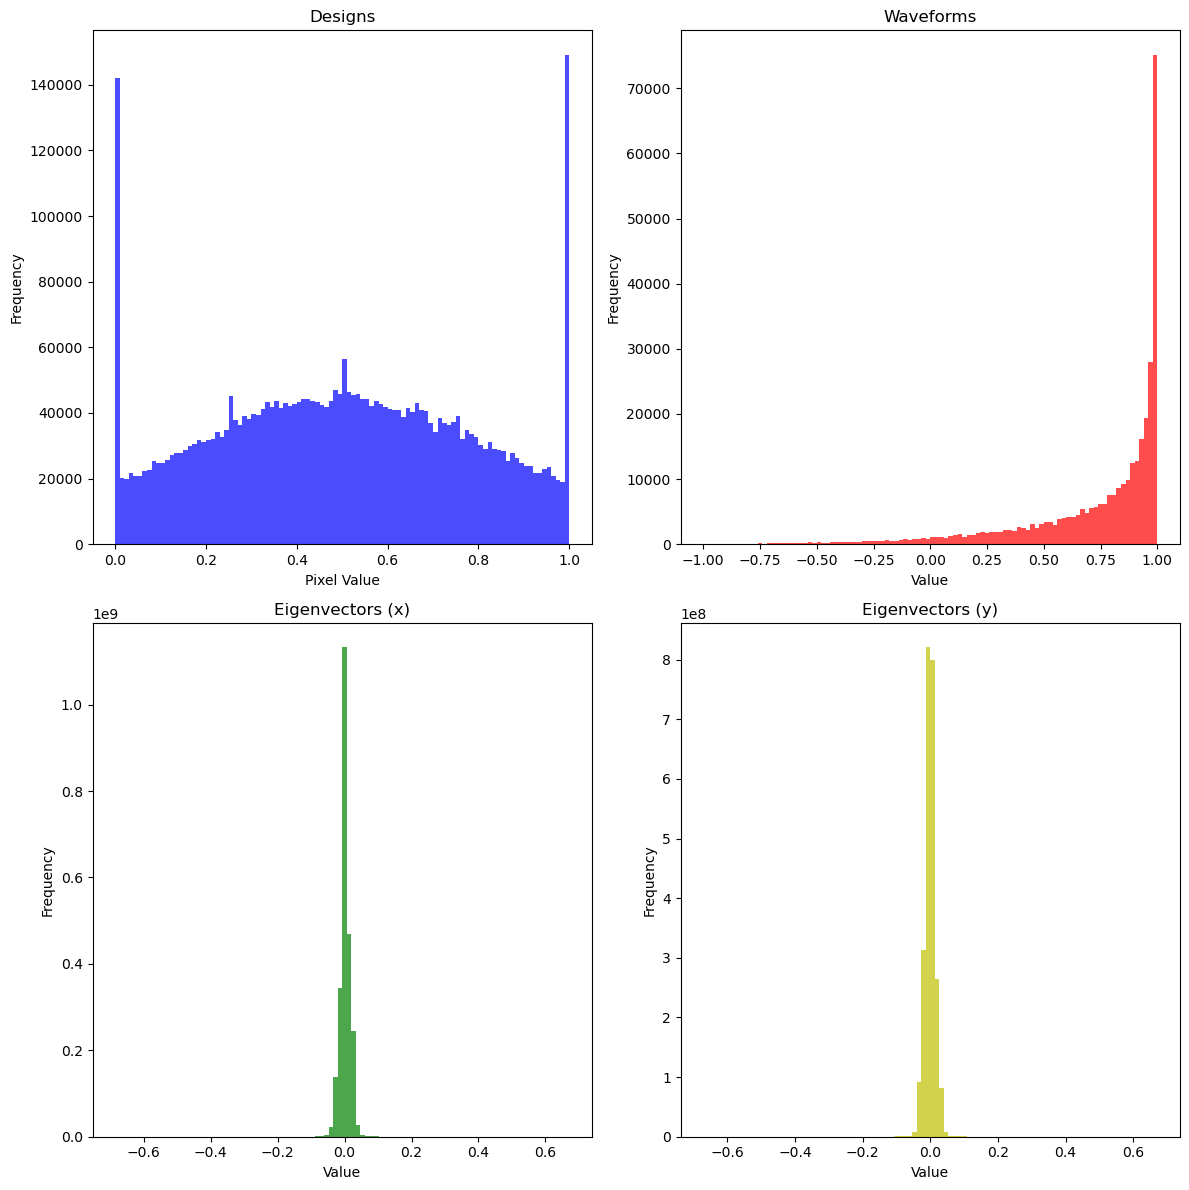

In [5]:
# Plot the histograms of flattened real values for each array
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].hist(designs_flat, bins=100, color='b', alpha=0.7)
axes[0, 0].set_title('Designs')
axes[0, 0].set_xlabel('Pixel Value')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(WAVEFORM_DATA_flat, bins=100, color='r', alpha=0.7)
axes[0, 1].set_title('Waveforms')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(EIGENVECTOR_DATA_x_flat.real, bins=100, color='g', alpha=0.7)
axes[1, 0].set_title('Eigenvectors (x)')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(EIGENVECTOR_DATA_y_flat.real, bins=100, color='y', alpha=0.7)
axes[1, 1].set_title('Eigenvectors (y)')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
# Plot the histograms of flattened log abs values for each array
# fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# 
# axes[0, 0].hist(designs_flat_symlog, bins=100, color='b', alpha=0.7)
# axes[0, 0].set_title('Designs')
# axes[0, 0].set_xlabel('Log Abs Value')
# axes[0, 0].set_ylabel('Frequency')
# 
# axes[0, 1].hist(WAVEFORM_DATA_flat_symlog, bins=100, color='r', alpha=0.7)
# axes[0, 1].set_title('Waveforms')
# axes[0, 1].set_xlabel('Log Abs Value')
# axes[0, 1].set_ylabel('Frequency')
# 
# axes[1, 0].hist(EIGENVECTOR_DATA_x_flat_symlog, bins=100, color='g', alpha=0.7)
# axes[1, 0].set_title('Eigenvectors (x)')
# axes[1, 0].set_xlabel('Log Abs Value')
# axes[1, 0].set_ylabel('Frequency')
# 
# axes[1, 1].hist(EIGENVECTOR_DATA_y_flat_symlog, bins=100, color='y', alpha=0.7)
# axes[1, 1].set_title('Eigenvectors (y)')
# axes[1, 1].set_xlabel('Log Abs Value')
# axes[1, 1].set_ylabel('Frequency')
# 
# plt.tight_layout()
# plt.show()

In [6]:
# Draw a random design and its corresponding eigenvectors
#n_bands = 6
random_seed = 36
random.seed(random_seed)
sample_index = np.random.randint(0, n_designs)
sample_geometry = designs[sample_index, 0]
sample_band = np.random.randint(0, n_bands)
sample_waveform_index = np.random.randint(0, n_waveforms)
sample_waveform = waveforms[sample_waveform_index]
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_waveform_index}')

Design: 804, Band: 5, Wavevector: 118


designs shape: (1200, 3, 32, 32)
WAVEFORM_DATA shape: (325, 32, 32)
Average pixel values of all geometries: 0.49950732668277104
Average pixel values of all waveforms: 0.6164027212723144


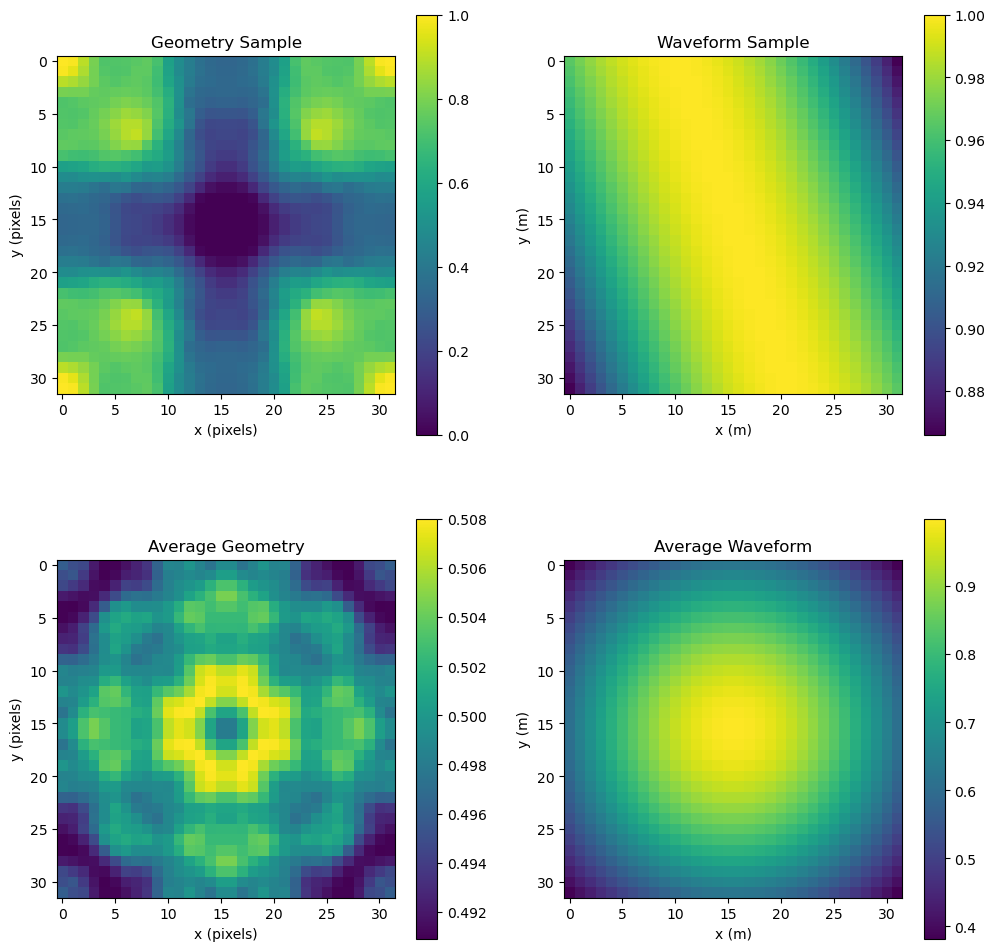

In [7]:
# Calculate the average values for geometry and waveform across all samples
print(f'designs shape: {designs.shape}')
print(f'WAVEFORM_DATA shape: {waveforms.shape}')

avg_geometry = np.mean(designs[:, 0], axis=0)
avg_waveform = np.mean(waveforms[:], axis=0)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the geometry sample on the top-left
im1 = axes[0, 0].imshow(sample_geometry, cmap='viridis')
axes[0, 0].set_title('Geometry Sample')
axes[0, 0].set_xlabel('x (pixels)')
axes[0, 0].set_ylabel('y (pixels)')
plt.colorbar(im1, ax=axes[0, 0])

# Plot the waveform sample on the top-right
im2 = axes[0, 1].imshow(sample_waveform, cmap='viridis')
axes[0, 1].set_title('Waveform Sample')
axes[0, 1].set_xlabel('x (m)')
axes[0, 1].set_ylabel('y (m)')
plt.colorbar(im2, ax=axes[0, 1])

# Plot the average geometry on the bottom-left
im3 = axes[1, 0].imshow(avg_geometry, cmap='viridis')
axes[1, 0].set_title('Average Geometry')
axes[1, 0].set_xlabel('x (pixels)')
axes[1, 0].set_ylabel('y (pixels)')
plt.colorbar(im3, ax=axes[1, 0])

# Plot the average waveform on the bottom-right
im4 = axes[1, 1].imshow(avg_waveform, cmap='viridis')
axes[1, 1].set_title('Average Waveform')
axes[1, 1].set_xlabel('x (m)')
axes[1, 1].set_ylabel('y (m)')
plt.colorbar(im4, ax=axes[1, 1])

print(f'Average pixel values of all geometries: {np.mean(designs[:,0])}')
print(f'Average pixel values of all waveforms: {np.mean(waveforms[0,:])}')

Design: 804, Band: 5, Wavevector: 118


C:\Users\hz283\Documents\Duke\Research\NO-2D-Metamaterials\NO_utils.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


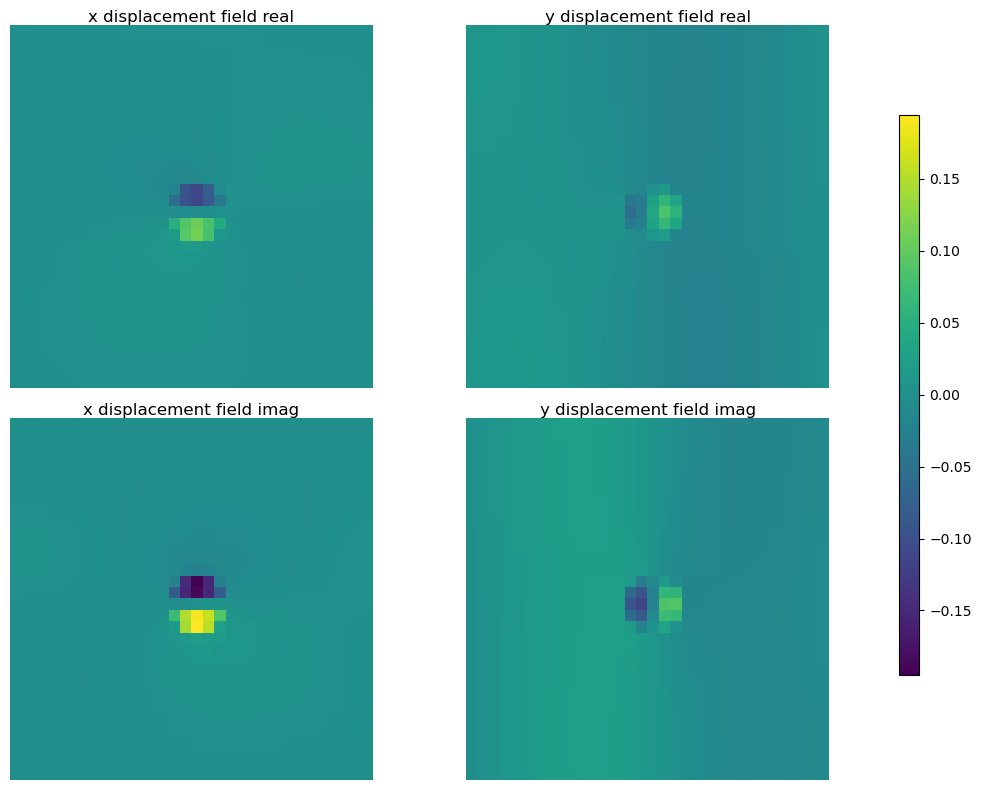

In [8]:
# View eigenvectors for the selected design, band, and wavevector
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_waveform_index}')
sample_eigenvector_x = eigenvector_data_x[sample_index, sample_waveform_index, sample_band]
sample_eigenvector_y = eigenvector_data_y[sample_index, sample_waveform_index, sample_band]

NO_utils.plot_eigenvectors(sample_eigenvector_x, sample_eigenvector_y, unify_scales=True)

## Model architecture & training

In [9]:
# Import modules for building a neural operator model
import numpy as np
import scipy as sp
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR

# Import specialized neural operator model tools
from neuralop.models import FNO, FNO2d, TFNO, TFNO2d
from neuralop import Trainer
from neuralop.training import CheckpointCallback
from neuralop.datasets import load_darcy_flow_small
from neuralop.utils import count_model_params
from neuralop.datasets import data_transforms
from neuralop import LpLoss, H1Loss

# For creating datasets and data loaders for training and evaluation
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split, ConcatDataset
from sklearn.preprocessing import StandardScaler

# Optional: torchvision for augmentations and transformations (if working with image-like data)
import torchvision.transforms as transforms

# For plotting and visualization
import matplotlib.pyplot as plt

# Optional: Use tqdm for progress bars during training and evaluation
from tqdm import tqdm

# Optional: If you are working with graph data or architectures
# import torch_geometric

# If you need automatic differentiation for custom operations or gradients
from torch.autograd import Function

In [10]:
#Set the device for the neural operator model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using Device:', device)
print("Using PyTorch version:", torch.__version__)

Using Device: cuda
Using PyTorch version: 2.4.1+cu118


In [11]:
# Print the shape of the first input tensor for confirmation
print("Shape of the first input tensor to be assigned:")
print("designs[0, 0]:", designs[0, 0].shape)
print("WAVEFORM_DATA[0, 0]:", waveforms[0, 0].shape)

# Print the shape of the first output tensor for confirmation
print("Shape of the first output tensor to be assigned:")
print("EIGENVECTOR_DATA_x[0, 0, 0]:", eigenvector_data_x[0, 0, 0].shape)
print("EIGENVECTOR_DATA_x[0, 0, 0]:", eigenvector_data_y[0, 0, 0].shape)

Shape of the first input tensor to be assigned:
designs[0, 0]: (32, 32)
WAVEFORM_DATA[0, 0]: (32,)
Shape of the first output tensor to be assigned:
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)


In [13]:
def symlog_transform(x, linthresh=1):
    return np.sign(x) * np.log10(np.abs(x) + linthresh)

def symlog_inverse_transform(y, linthresh=1):
    return np.sign(y) * (10**np.abs(y) - linthresh)

# Function to fit and transform with StandardScaler, with optional symlog transformation
def standardize_array(array, symlog=False):
    scaler = StandardScaler()
    original_shape = array.shape
    array_flat = array.reshape(-1, 1)  # Flatten the array to 2D

    if symlog:
        array_flat = symlog_transform(array_flat)

    array_standardized = scaler.fit_transform(array_flat).reshape(original_shape)
    mean = scaler.mean_[0]
    scale = scaler.scale_[0]

    return array_standardized, mean, scale, symlog

In [14]:
# Standardizing EIGENVALUE_DATA and casting to float16
EIGENVALUE_DATA_standardized, eigenvalue_mean, eigenvalue_scale, _ = standardize_array(eigenvalue_data)
EIGENVALUE_DATA_standardized = EIGENVALUE_DATA_standardized.astype(np.float16)

# Standardizing EIGENVECTOR_DATA_x (real and imaginary parts separately) and casting to float16
EIGENVECTOR_x_r = eigenvector_data_x.real.astype(np.float16)
EIGENVECTOR_x_i = eigenvector_data_x.imag.astype(np.float16)

EIGENVECTOR_x_r_standardized, eigvector_x_r_mean, eigvector_x_r_scale, _ = standardize_array(EIGENVECTOR_x_r)
EIGENVECTOR_x_r_standardized = EIGENVECTOR_x_r_standardized.astype(np.float16)

EIGENVECTOR_x_i_standardized, eigvector_x_i_mean, eigvector_x_i_scale, _ = standardize_array(EIGENVECTOR_x_i)
EIGENVECTOR_x_i_standardized = EIGENVECTOR_x_i_standardized.astype(np.float16)

# Standardizing EIGENVECTOR_DATA_y (real and imaginary parts separately) and casting to float16
EIGENVECTOR_y_r = eigenvector_data_y.real.astype(np.float16)
EIGENVECTOR_y_i = eigenvector_data_y.imag.astype(np.float16)

EIGENVECTOR_y_r_standardized, eigvector_y_r_mean, eigvector_y_r_scale, _ = standardize_array(EIGENVECTOR_y_r)
EIGENVECTOR_y_r_standardized = EIGENVECTOR_y_r_standardized.astype(np.float16)

EIGENVECTOR_y_i_standardized, eigvector_y_i_mean, eigvector_y_i_scale, _ = standardize_array(EIGENVECTOR_y_i)
EIGENVECTOR_y_i_standardized = EIGENVECTOR_y_i_standardized.astype(np.float16)

# Standardizing WAVEVECTOR_DATA and casting to float16
WAVEVECTOR_DATA_standardized, wavevector_mean, wavevector_scale, _ = standardize_array(waveforms)
WAVEVECTOR_DATA_standardized = WAVEVECTOR_DATA_standardized.astype(np.float16)

del eigenvector_data_x, eigenvector_data_y


In [15]:
# Print shapes and data types of arrays to verify
print("EIGENVALUE_DATA_standardized shape:", EIGENVALUE_DATA_standardized.shape, "dtype:", EIGENVALUE_DATA_standardized.dtype)
print("EIGENVECTOR_x_r_standardized shape:", EIGENVECTOR_x_r_standardized.shape, "dtype:", EIGENVECTOR_x_r_standardized.dtype)
print("EIGENVECTOR_x_i_standardized shape:", EIGENVECTOR_x_i_standardized.shape, "dtype:", EIGENVECTOR_x_i_standardized.dtype)
print("EIGENVECTOR_y_r_standardized shape:", EIGENVECTOR_y_r_standardized.shape, "dtype:", EIGENVECTOR_y_r_standardized.dtype)
print("EIGENVECTOR_y_i_standardized shape:", EIGENVECTOR_y_i_standardized.shape, "dtype:", EIGENVECTOR_y_i_standardized.dtype)
print("WAVEVECTOR_DATA_standardized shape:", WAVEVECTOR_DATA_standardized.shape, "dtype:", WAVEVECTOR_DATA_standardized.dtype)
print('\n')

# Print the mean and scale values for each standardized array
print("Eigenvalue mean, scale:", eigenvalue_mean, eigenvalue_scale)
print("Eigenvector x real mean, scale:", eigvector_x_r_mean, eigvector_x_r_scale)
print("Eigenvector x imag mean, scale:", eigvector_x_i_mean, eigvector_x_i_scale)
print("Eigenvector y real mean, scale:", eigvector_y_r_mean, eigvector_y_r_scale)
print("Eigenvector y imag mean, scale:", eigvector_y_i_mean, eigvector_y_i_scale)
print("Wavevector mean, scale:", wavevector_mean, wavevector_scale)
print('\n')

# Print the full range and data types of values for each standardized array
print("Eigenvalue range:", np.min(EIGENVALUE_DATA_standardized), np.max(EIGENVALUE_DATA_standardized), "dtype:", EIGENVALUE_DATA_standardized.dtype)
print("Eigenvector x real range:", np.min(EIGENVECTOR_x_r_standardized), np.max(EIGENVECTOR_x_r_standardized), "dtype:", EIGENVECTOR_x_r_standardized.dtype)
print("Eigenvector x imag range:", np.min(EIGENVECTOR_x_i_standardized), np.max(EIGENVECTOR_x_i_standardized), "dtype:", EIGENVECTOR_x_i_standardized.dtype)
print("Eigenvector y real range:", np.min(EIGENVECTOR_y_r_standardized), np.max(EIGENVECTOR_y_r_standardized), "dtype:", EIGENVECTOR_y_r_standardized.dtype)
print("Eigenvector y imag range:", np.min(EIGENVECTOR_y_i_standardized), np.max(EIGENVECTOR_y_i_standardized), "dtype:", EIGENVECTOR_y_i_standardized.dtype)
print("Wavevector range:", np.min(WAVEVECTOR_DATA_standardized), np.max(WAVEVECTOR_DATA_standardized), "dtype:", WAVEVECTOR_DATA_standardized.dtype)

EIGENVALUE_DATA_standardized shape: (1200, 325, 6) dtype: float16
EIGENVECTOR_x_r_standardized shape: (1200, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_x_i_standardized shape: (1200, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_y_r_standardized shape: (1200, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_y_i_standardized shape: (1200, 325, 6, 32, 32) dtype: float16
WAVEVECTOR_DATA_standardized shape: (325, 32, 32) dtype: float16


Eigenvalue mean, scale: 1888.45629610841 798.7035228569971
Eigenvector x real mean, scale: 0.0018384516813742537 0.016231847979193005
Eigenvector x imag mean, scale: -0.00089244377248225 0.014878183713681487
Eigenvector y real mean, scale: -0.0006618553531460631 0.015983150608088227
Eigenvector y imag mean, scale: -0.0008376610355342004 0.015197106699671654
Wavevector mean, scale: 0.7354731009461464 0.3362319766565927


Eigenvalue range: -2.363 2.79 dtype: float16
Eigenvector x real range: -42.34 41.25 dtype: float16
Eigenvector x imag range: -39.06 39.1 dtype: flo

In [16]:
# # Standardizing EIGENVALUE_DATA and casting to float16
# EIGENVALUE_DATA_log_standardized, eigenvalue_log_mean, eigenvalue_log_scale, _ = standardize_array(EIGENVALUE_DATA, symlog=True)
# EIGENVALUE_DATA_log_standardized = EIGENVALUE_DATA_log_standardized.astype(np.float16)
# 
# # Standardizing EIGENVECTOR_DATA_x (real and imaginary parts separately) and casting to float16
# EIGENVECTOR_x_r_log_standardized, eigvector_x_r_log_mean, eigvector_x_r_log_scale, _ = standardize_array(EIGENVECTOR_x_r, symlog=True)
# EIGENVECTOR_x_r_log_standardized = EIGENVECTOR_x_r_log_standardized.astype(np.float16)
# 
# EIGENVECTOR_x_i_log_standardized, eigvector_x_i_log_mean, eigvector_x_i_log_scale, _ = standardize_array(EIGENVECTOR_x_i, symlog=True)
# EIGENVECTOR_x_i_log_standardized = EIGENVECTOR_x_i_log_standardized.astype(np.float16)
# 
# # Standardizing EIGENVECTOR_DATA_y (real and imaginary parts separately) and casting to float16
# EIGENVECTOR_y_r_log_standardized, eigvector_y_r_log_mean, eigvector_y_r_log_scale, _ = standardize_array(EIGENVECTOR_y_r, symlog=True)
# EIGENVECTOR_y_r_log_standardized = EIGENVECTOR_y_r_log_standardized.astype(np.float16)
# 
# EIGENVECTOR_y_i_log_standardized, eigvector_y_i_log_mean, eigvector_y_i_log_scale, _ = standardize_array(EIGENVECTOR_y_i, symlog=True)
# EIGENVECTOR_y_i_log_standardized = EIGENVECTOR_y_i_log_standardized.astype(np.float16)
# 
# # Standardizing WAVEVECTOR_DATA and casting to float16
# WAVEVECTOR_DATA_log_standardized, wavevector_log_mean, wavevector_log_scale, _ = standardize_array(WAVEVECTOR_DATA, symlog=True)
# WAVEVECTOR_DATA_log_standardized = WAVEVECTOR_DATA_log_standardized.astype(np.float16)


In [17]:
# # Print shapes and data types of symlog arrays to verify
# print("EIGENVALUE_DATA_log_standardized shape:", EIGENVALUE_DATA_log_standardized.shape, "dtype:", EIGENVALUE_DATA_log_standardized.dtype)
# print("EIGENVECTOR_x_r_log_standardized shape:", EIGENVECTOR_x_r_log_standardized.shape, "dtype:", EIGENVECTOR_x_r_log_standardized.dtype)
# print("EIGENVECTOR_x_i_log_standardized shape:", EIGENVECTOR_x_i_log_standardized.shape, "dtype:", EIGENVECTOR_x_i_log_standardized.dtype)
# print("EIGENVECTOR_y_r_log_standardized shape:", EIGENVECTOR_y_r_log_standardized.shape, "dtype:", EIGENVECTOR_y_r_log_standardized.dtype)
# print("EIGENVECTOR_y_i_log_standardized shape:", EIGENVECTOR_y_i_log_standardized.shape, "dtype:", EIGENVECTOR_y_i_log_standardized.dtype)
# print("WAVEVECTOR_DATA_log_standardized shape:", WAVEVECTOR_DATA_log_standardized.shape, "dtype:", WAVEVECTOR_DATA_log_standardized.dtype)
# print('\n')
# 
# # Print the mean and scale values for each standardized symlog array
# print("Eigenvalue mean, scale:", eigenvalue_log_mean, eigenvalue_log_scale)
# print("Eigenvector x real mean, scale:", eigvector_x_r_log_mean, eigvector_x_r_log_scale)
# print("Eigenvector x imag mean, scale:", eigvector_x_i_log_mean, eigvector_x_i_log_scale)
# print("Eigenvector y real mean, scale:", eigvector_y_r_log_mean, eigvector_y_r_log_scale)
# print("Eigenvector y imag mean, scale:", eigvector_y_i_log_mean, eigvector_y_i_log_scale)
# print("Wavevector mean, scale:", wavevector_log_mean, wavevector_log_scale)
# print('\n')
# 
# # Print the full range and data type of values for each standardized symlog array
# print("Eigenvalue range:", np.min(EIGENVALUE_DATA_log_standardized), np.max(EIGENVALUE_DATA_log_standardized), "dtype:", EIGENVALUE_DATA_log_standardized.dtype)
# print("Eigenvector x real range:", np.min(EIGENVECTOR_x_r_log_standardized), np.max(EIGENVECTOR_x_r_log_standardized), "dtype:", EIGENVECTOR_x_r_log_standardized.dtype)
# print("Eigenvector x imag range:", np.min(EIGENVECTOR_x_i_log_standardized), np.max(EIGENVECTOR_x_i_log_standardized), "dtype:", EIGENVECTOR_x_i_log_standardized.dtype)
# print("Eigenvector y real range:", np.min(EIGENVECTOR_y_r_log_standardized), np.max(EIGENVECTOR_y_r_log_standardized), "dtype:", EIGENVECTOR_y_r_log_standardized.dtype)
# print("Eigenvector y imag range:", np.min(EIGENVECTOR_y_i_log_standardized), np.max(EIGENVECTOR_y_i_log_standardized), "dtype:", EIGENVECTOR_y_i_log_standardized.dtype)
# print("Wavevector range:", np.min(WAVEVECTOR_DATA_log_standardized), np.max(WAVEVECTOR_DATA_log_standardized), "dtype:", WAVEVECTOR_DATA_log_standardized.dtype)


In [18]:
# Delete unused tensors to free up RAM
del EIGENVECTOR_DATA_x_flat, EIGENVECTOR_DATA_y_flat
del EIGENVECTOR_x_r, EIGENVECTOR_x_i, EIGENVECTOR_y_r, EIGENVECTOR_y_i

In [22]:
# Prepare input and output data
design_res = 32
# num_samples = n_designs * n_waveforms * n_bands
num_samples = n_designs * n_waveforms
input_data = torch.zeros((num_samples, 2, design_res, design_res))
output_data = torch.zeros((num_samples, 4, design_res, design_res))

sample_idx = 0
for i in range(n_designs):
    for j in range(n_waveforms):
        # for k in range(n_bands):
            # 
            # input_data[sample_idx, 0] = torch.from_numpy(designs[i, 0])
            # input_data[sample_idx, 1] = torch.from_numpy(waveforms[j])
            # input_data[sample_idx, 2] = torch.from_numpy(bands_fft[k])
            # 
            # output_data[sample_idx, 0] = torch.from_numpy(EIGENVECTOR_x_r_standardized[i, j, k])
            # output_data[sample_idx, 1] = torch.from_numpy(EIGENVECTOR_x_i_standardized[i, j, k])
            # output_data[sample_idx, 2] = torch.from_numpy(EIGENVECTOR_y_r_standardized[i, j, k])
            # output_data[sample_idx, 3] = torch.from_numpy(EIGENVECTOR_y_i_standardized[i, j, k])
            # 
            # sample_idx += 1
        input_data[sample_idx, 0] = torch.from_numpy(designs[i, 0])
        input_data[sample_idx, 1] = torch.from_numpy(waveforms[j])

        output_data[sample_idx, 0] = torch.from_numpy(EIGENVECTOR_x_r_standardized[i, j, 0])
        output_data[sample_idx, 1] = torch.from_numpy(EIGENVECTOR_x_i_standardized[i, j, 0])
        output_data[sample_idx, 2] = torch.from_numpy(EIGENVECTOR_y_r_standardized[i, j, 0])
        output_data[sample_idx, 3] = torch.from_numpy(EIGENVECTOR_y_i_standardized[i, j, 0])

        sample_idx += 1

# Create dataset
dataset = TensorDataset(input_data, output_data)

# Split dataset into train, test, and validation sets
train_size = int(0.75 * len(dataset))
test_size = int(0.2 * len(dataset))
val_size = len(dataset) - train_size - test_size

# train_dataset, test_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, test_size, val_size])

train_dataset, test_dataset, val_dataset = random_split(dataset, [train_size, test_size, val_size])

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Train dataset size: 292500
Test dataset size: 78000
Validation dataset size: 19500


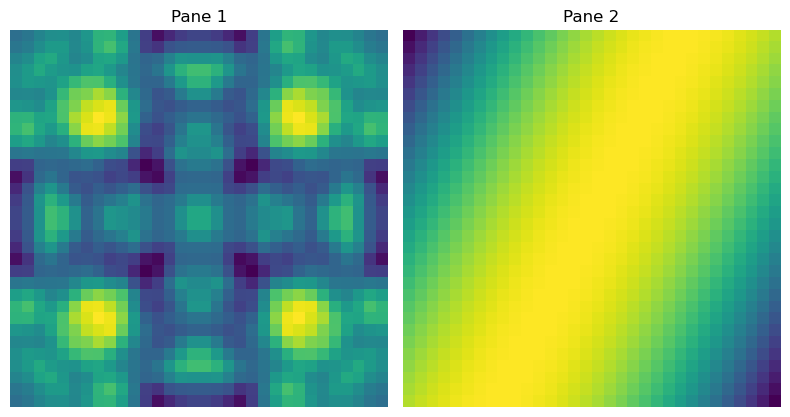

In [23]:
# Visualize a random sample input from the dataset
random_idx = np.random.randint(0, len(dataset))
random_input, random_output = dataset[random_idx]
input_shape = random_input.shape

fig, axes = plt.subplots(1, input_shape[0], figsize=(8, 8))
axes = axes.flatten()

for i in range(2):
    if i == 0:
        img = random_input[i].numpy()
    else:
        img = random_input[i].abs().numpy()
    axes[i].imshow(img, cmap='viridis')
    axes[i].set_title(f'Pane {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

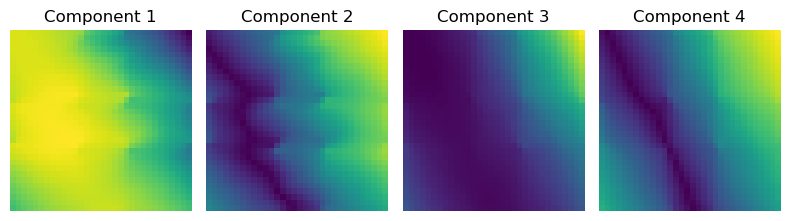

In [24]:
# Visualize a random sample output from the dataset
output_shape = random_output.shape

fig, axes = plt.subplots(1, output_shape[0], figsize=(8, 8))
axes = axes.flatten()

for i in range(4):
    if i % 2 == 0:
        img = random_output[i].numpy()
    else:
        img = random_output[i].abs().numpy()
    axes[i].imshow(img, cmap='viridis')
    axes[i].set_title(f'Component {i+1}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [25]:
# Print the shapes of the input and output data, train, test, and validation sets
print('Input data shape:', input_data.shape)
print('Output data shape:', output_data.shape)
print('Train data size:', len(train_dataset))
print('Test data size:', len(test_dataset))
print('Validation data size:', len(val_dataset))

# Inspect the first batch of data
for sample in train_loader:
    print('Batch shape:', sample[0].shape, sample[1].shape)
    #print(sample)
    break

Input data shape: torch.Size([390000, 2, 32, 32])
Output data shape: torch.Size([390000, 4, 32, 32])
Train data size: 292500
Test data size: 78000
Validation data size: 19500
Batch shape: torch.Size([256, 2, 32, 32]) torch.Size([256, 4, 32, 32])


In [26]:
class FourierNeuralOperator(nn.Module):
    def __init__(self, modes_height, modes_width, in_channels=2, out_channels=4, hidden=32, num_layers=4):
        super(FourierNeuralOperator, self).__init__()
        self.modes_height = modes_height  # Number of Fourier modes in height dimension
        self.modes_width = modes_width  # Number of Fourier modes in width dimension
        self.hidden = hidden  # Width of the hidden channels
        self.in_channels = in_channels  # Number of input channels
        self.out_channels = out_channels  # Number of output channels
        self.num_layers = num_layers

        # FNO2d layer
        self.fno = FNO2d(in_channels=self.in_channels, out_channels=self.out_channels, n_modes_height=self.modes_height, n_modes_width=self.modes_width, hidden_channels=self.hidden, num_layers=self.num_layers)

    def forward(self, x):
        # Apply the FNO2d layer
        x = self.fno(x)
        return x

In [27]:
def train_one_epoch(model, loader, criterion, optimizer, device, epoch, report_freq=100, save_after_batch=False, save_path=None):
    model.train()
    running_loss = 0.0
    total_batches = len(loader)
    progress_bar = tqdm(enumerate(loader), total=total_batches, desc=f"Epoch {epoch + 1}")

    for batch_idx, (inputs, targets) in progress_bar:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

        # Print progress for each batch
        if (batch_idx + 1) % report_freq == 0 or (batch_idx + 1) == total_batches:
            progress_bar.set_postfix(batch_loss=loss.item())

        # Save model weights after each batch if the flag is set
        if save_after_batch and save_path:
            save_model(model, save_path)

    epoch_loss = running_loss / len(loader.dataset)

    # Save model weights after each epoch if the flag is not set
    if not save_after_batch and save_path:
        save_model(model, save_path)

    return epoch_loss

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in tqdm(loader, desc="Evaluating"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
            running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss

# Function to save the model weights
def save_model(model, file_path):
    torch.save(model.state_dict(), file_path)

# Function to load the model weights
def load_model(model, file_path):
    model.load_state_dict(torch.load(file_path))

In [28]:
def plot_sample(data, title, labels, shared_colorbar=False, vmin=None, vmax=None, layout=None, save=False, save_path='plot.png'):
    # Automatically select layout based on the number of data arrays if not provided
    num_arrays = data.shape[0]
    if layout is None:
        if num_arrays == 3:
            layout = (1, 3)
        elif num_arrays == 4:
            layout = (2, 2)
        else:
            raise ValueError("Data input must have 3 or 4 arrays for plotting.")

    # Adjust figure size based on layout
    if layout == (1, 3):
        fig, axes = plt.subplots(*layout, figsize=(12, 4))  # Wide and short for 1x3 layout
    elif layout == (2, 2):
        fig, axes = plt.subplots(*layout, figsize=(8, 8))   # Square for 2x2 layout
    else:
        raise ValueError("Unsupported layout")

    for ax, (idx, label) in zip(axes.flatten(), labels):
        im = ax.imshow(data[idx, :, :].cpu(), cmap='viridis', vmin=vmin if shared_colorbar else None, vmax=vmax if shared_colorbar else None)
        ax.set_title(label)
        if not shared_colorbar:
            fig.colorbar(im, ax=ax)

    if shared_colorbar:
        # Add a single colorbar to the right of the plot
        cbar = fig.colorbar(im, ax=axes.ravel().tolist())
        cbar.ax.set_ylabel('Color scale')

    plt.suptitle(title)

    if save:
        # Save the figure
        plt.savefig(save_path)
        print(f"Plot saved at {save_path}")
        plt.close(fig)
    else:
        # Display the figure
        plt.show()

def plot_inputs(data, title, labels, save=False, save_path='example_plot.png'):
    # Plot inputs with layout (1, 3) and custom figure size
    plot_sample(data, title, labels, shared_colorbar=True, layout=(1, 3), save=save, save_path=save_path)

def plot_predictions_and_targets(inputs, outputs, targets, save=False, save_dir='figures/', file_suffix='example'):
    # Ensure save directory exists if save is True
    if save:
        os.makedirs(save_dir, exist_ok=True)

    # Add file_suffix to the filenames
    input_filename = f'{save_dir}/input_{file_suffix}.png'
    output_filename = f'{save_dir}/output_{file_suffix}.png'
    target_filename = f'{save_dir}/target_{file_suffix}.png'

    input_labels = [(0, 'geometry'), (1, 'waveform'), (2, 'band')]
    plot_inputs(inputs, 'Inputs', input_labels, save=save, save_path=input_filename)

    # Compute global min and max for shared colorbar between outputs and targets
    vmin = min(np.min(outputs.cpu().numpy()), np.min(targets.cpu().numpy()))
    vmax = max(np.max(outputs.cpu().numpy()), np.max(targets.cpu().numpy()))

    prediction_labels = [(0, 'eigenvector_x_real'), (1, 'eigenvector_x_imag'), (2, 'eigenvector_y_real'), (3, 'eigenvector_y_imag')]
    plot_sample(outputs, "Model Predictions", prediction_labels, shared_colorbar=True, vmin=vmin, vmax=vmax, save=save, save_path=output_filename)

    target_labels = [(0, 'eigenvector_x_real'), (1, 'eigenvector_x_imag'), (2, 'eigenvector_y_real'), (3, 'eigenvector_y_imag')]
    plot_sample(targets, "Target Values", target_labels, shared_colorbar=True, vmin=vmin, vmax=vmax, save=save, save_path=target_filename)


In [44]:
hc = 256; lr = 1e-3; wd = 1e-5; ss = 10; gamma = 0.1

hcs = [64, 128, 256]
lrs = [1e-3, 1e-2]

# Create a 2D array to store the best val loss for each (hc, lr)
best_val_losses_map = np.zeros((len(hcs), len(lrs)))

model = FourierNeuralOperator(modes_height=design_res, modes_width=design_res, in_channels=2, out_channels=4, hidden=hc).to(device)

# # Define the loss function
# criterion = nn.MSELoss()  # Mean Squared Error loss
# 
# # Define the optimizer
# optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
# 
# # Define the learning rate scheduler
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=ss, gamma=gamma)

In [45]:
# # Parameters for saving/loading model weights
# save_path = f'./model_weights_hc{hc}_lr{lr:.0e}_wd{wd:.0e}_ss{ss}_gamma{gamma:.0e}.pth'
# print(save_path)
# load_existing_model = False  # Set to True if you want to load an existing model
# 
# # Load the model weights if a valid file path is provided and the flag is set
# if load_existing_model and os.path.isfile(save_path):
#     load_model(model, save_path)
#     print(f"Loaded model weights from {save_path}")
# 
# # Lists to store losses for plotting
# train_losses = []
# val_losses = []

In [46]:
# ==== Perform the Grid Search ====
for i, hc in enumerate(hcs):
    for j, lr in enumerate(lrs):
        # Create a folder for this particular set of hyperparameters
        timestamp = datetime.now().strftime("%y%m%d-%H%M%S")
        model_folder = f"model_{timestamp}_lr{lr}_wd{wd}_ss{ss}_gamma{gamma}_dr{design_res}_hc{hc}"
        os.makedirs(model_folder, exist_ok=True)

        # Define model, criterion, optimizer, scheduler
        model = FourierNeuralOperator(
            modes_height=design_res,
            modes_width=design_res,
            in_channels=2,
            out_channels=4,
            hidden=hc
        ).to(device)

        criterion = nn.MSELoss()  # Mean Squared Error
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=ss, gamma=gamma)

        train_losses = []
        val_losses = []
        best_val_loss = float("inf")
        best_model_path = None

        # ==== Training Loop ====
        for epoch in range(num_epochs):
            train_loss = train_one_epoch(
                model=model,
                loader=train_loader,
                criterion=criterion,
                optimizer=optimizer,
                device=device,
                epoch=epoch,
                report_freq=256,
                save_after_batch=False,  # saving per batch if desired
                save_path=None           # no save at every batch
            )

            val_loss = evaluate(model, val_loader, criterion, device)

            # Print progress for each epoch
            print(f"Epoch {epoch+1}/{num_epochs} [hc={hc}, lr={lr}] --> "
                  f"Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")

            train_losses.append(train_loss)
            val_losses.append(val_loss)

            # Checkpoint the best model
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_path = os.path.join(
                    model_folder,
                    f"best_model_hc{hc}_lr{lr}_epoch{epoch+1}.pt"
                )
                torch.save(model.state_dict(), best_model_path)

            # Step the scheduler
            scheduler.step(val_loss)

        # Save the training & validation losses to CSV
        csv_path = os.path.join(
            model_folder, f"losses_hc{hc}_lr{lr}.csv"
        )
        with open(csv_path, "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerow(["epoch", "train_loss", "val_loss"])
            for epoch_idx in range(num_epochs):
                writer.writerow([epoch_idx + 1, train_losses[epoch_idx], val_losses[epoch_idx]])

        # Store the best validation loss in the 2D array
        best_val_losses_map[i, j] = best_val_loss


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 37.01it/s]


Epoch 1/100 [hc=64, lr=0.001] --> Train Loss: 0.265074, Val Loss: 0.209930


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.53it/s]


Epoch 2/100 [hc=64, lr=0.001] --> Train Loss: 0.195680, Val Loss: 0.189008


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.01it/s]


Epoch 3/100 [hc=64, lr=0.001] --> Train Loss: 0.181301, Val Loss: 0.177147


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 38.79it/s]


Epoch 4/100 [hc=64, lr=0.001] --> Train Loss: 0.174236, Val Loss: 0.172412


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.45it/s]


Epoch 5/100 [hc=64, lr=0.001] --> Train Loss: 0.170191, Val Loss: 0.174821


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.09it/s]


Epoch 6/100 [hc=64, lr=0.001] --> Train Loss: 0.166546, Val Loss: 0.167666


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.85it/s]


Epoch 7/100 [hc=64, lr=0.001] --> Train Loss: 0.163341, Val Loss: 0.163548


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.43it/s]


Epoch 8/100 [hc=64, lr=0.001] --> Train Loss: 0.159890, Val Loss: 0.162068


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.83it/s]


Epoch 9/100 [hc=64, lr=0.001] --> Train Loss: 0.155910, Val Loss: 0.158311


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.12it/s]


Epoch 10/100 [hc=64, lr=0.001] --> Train Loss: 0.152090, Val Loss: 0.156679


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.23it/s]


Epoch 11/100 [hc=64, lr=0.001] --> Train Loss: 0.148007, Val Loss: 0.153856


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.50it/s]


Epoch 12/100 [hc=64, lr=0.001] --> Train Loss: 0.143826, Val Loss: 0.152424


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.84it/s]


Epoch 13/100 [hc=64, lr=0.001] --> Train Loss: 0.140258, Val Loss: 0.152654


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.26it/s]


Epoch 14/100 [hc=64, lr=0.001] --> Train Loss: 0.136382, Val Loss: 0.149800


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 15/100 [hc=64, lr=0.001] --> Train Loss: 0.132483, Val Loss: 0.148422


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.20it/s]


Epoch 16/100 [hc=64, lr=0.001] --> Train Loss: 0.128697, Val Loss: 0.145983


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 17/100 [hc=64, lr=0.001] --> Train Loss: 0.125418, Val Loss: 0.144624


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.95it/s]


Epoch 18/100 [hc=64, lr=0.001] --> Train Loss: 0.121251, Val Loss: 0.143591


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 19/100 [hc=64, lr=0.001] --> Train Loss: 0.117105, Val Loss: 0.142557


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.15it/s]


Epoch 20/100 [hc=64, lr=0.001] --> Train Loss: 0.112799, Val Loss: 0.142859


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 37.57it/s]


Epoch 21/100 [hc=64, lr=0.001] --> Train Loss: 0.108264, Val Loss: 0.143635


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 22/100 [hc=64, lr=0.001] --> Train Loss: 0.103891, Val Loss: 0.141954


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.28it/s]


Epoch 23/100 [hc=64, lr=0.001] --> Train Loss: 0.100021, Val Loss: 0.139036


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.11it/s]


Epoch 24/100 [hc=64, lr=0.001] --> Train Loss: 0.096738, Val Loss: 0.141693


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.90it/s]


Epoch 25/100 [hc=64, lr=0.001] --> Train Loss: 0.093347, Val Loss: 0.144807


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.36it/s]


Epoch 26/100 [hc=64, lr=0.001] --> Train Loss: 0.090517, Val Loss: 0.142271


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.19it/s]


Epoch 27/100 [hc=64, lr=0.001] --> Train Loss: 0.087161, Val Loss: 0.141696


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.28it/s]


Epoch 28/100 [hc=64, lr=0.001] --> Train Loss: 0.084836, Val Loss: 0.145801


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.14it/s]


Epoch 29/100 [hc=64, lr=0.001] --> Train Loss: 0.082243, Val Loss: 0.145543


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.70it/s]


Epoch 30/100 [hc=64, lr=0.001] --> Train Loss: 0.080024, Val Loss: 0.147204


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.25it/s]


Epoch 31/100 [hc=64, lr=0.001] --> Train Loss: 0.077560, Val Loss: 0.147445


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.19it/s]


Epoch 32/100 [hc=64, lr=0.001] --> Train Loss: 0.075111, Val Loss: 0.150424


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.00it/s]


Epoch 33/100 [hc=64, lr=0.001] --> Train Loss: 0.073001, Val Loss: 0.148730


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.26it/s]


Epoch 34/100 [hc=64, lr=0.001] --> Train Loss: 0.071259, Val Loss: 0.149956


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.25it/s]


Epoch 35/100 [hc=64, lr=0.001] --> Train Loss: 0.069247, Val Loss: 0.149260


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.36it/s]


Epoch 36/100 [hc=64, lr=0.001] --> Train Loss: 0.067555, Val Loss: 0.153211


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.29it/s]


Epoch 37/100 [hc=64, lr=0.001] --> Train Loss: 0.065775, Val Loss: 0.154914


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.16it/s]


Epoch 38/100 [hc=64, lr=0.001] --> Train Loss: 0.064196, Val Loss: 0.152230


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.46it/s]


Epoch 39/100 [hc=64, lr=0.001] --> Train Loss: 0.062540, Val Loss: 0.157143


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.38it/s]


Epoch 40/100 [hc=64, lr=0.001] --> Train Loss: 0.061603, Val Loss: 0.151945


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.14it/s]


Epoch 41/100 [hc=64, lr=0.001] --> Train Loss: 0.059612, Val Loss: 0.156317


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.11it/s]


Epoch 42/100 [hc=64, lr=0.001] --> Train Loss: 0.058377, Val Loss: 0.159825


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.87it/s]


Epoch 43/100 [hc=64, lr=0.001] --> Train Loss: 0.056957, Val Loss: 0.158664


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.75it/s]


Epoch 44/100 [hc=64, lr=0.001] --> Train Loss: 0.055810, Val Loss: 0.165222


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.76it/s]


Epoch 45/100 [hc=64, lr=0.001] --> Train Loss: 0.054625, Val Loss: 0.166829


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 33.62it/s]


Epoch 46/100 [hc=64, lr=0.001] --> Train Loss: 0.053518, Val Loss: 0.163198


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.14it/s]


Epoch 47/100 [hc=64, lr=0.001] --> Train Loss: 0.052269, Val Loss: 0.161356


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 37.91it/s]


Epoch 48/100 [hc=64, lr=0.001] --> Train Loss: 0.051698, Val Loss: 0.168614


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.13it/s]


Epoch 49/100 [hc=64, lr=0.001] --> Train Loss: 0.050425, Val Loss: 0.167530


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.55it/s]


Epoch 50/100 [hc=64, lr=0.001] --> Train Loss: 0.049142, Val Loss: 0.169869


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.74it/s]


Epoch 51/100 [hc=64, lr=0.001] --> Train Loss: 0.048426, Val Loss: 0.172953


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.14it/s]


Epoch 52/100 [hc=64, lr=0.001] --> Train Loss: 0.047377, Val Loss: 0.173871


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.19it/s]


Epoch 53/100 [hc=64, lr=0.001] --> Train Loss: 0.046629, Val Loss: 0.181474


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.23it/s]


Epoch 54/100 [hc=64, lr=0.001] --> Train Loss: 0.045795, Val Loss: 0.177294


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.05it/s]


Epoch 55/100 [hc=64, lr=0.001] --> Train Loss: 0.044441, Val Loss: 0.176966


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.30it/s]


Epoch 56/100 [hc=64, lr=0.001] --> Train Loss: 0.044706, Val Loss: 0.183090


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.40it/s]


Epoch 57/100 [hc=64, lr=0.001] --> Train Loss: 0.043487, Val Loss: 0.188864


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.37it/s]


Epoch 58/100 [hc=64, lr=0.001] --> Train Loss: 0.041947, Val Loss: 0.183500


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.54it/s]


Epoch 59/100 [hc=64, lr=0.001] --> Train Loss: 0.042005, Val Loss: 0.189381


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.32it/s]


Epoch 60/100 [hc=64, lr=0.001] --> Train Loss: 0.041304, Val Loss: 0.190178


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.28it/s]


Epoch 61/100 [hc=64, lr=0.001] --> Train Loss: 0.041052, Val Loss: 0.191268


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.48it/s]


Epoch 62/100 [hc=64, lr=0.001] --> Train Loss: 0.040341, Val Loss: 0.193646


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.51it/s]


Epoch 63/100 [hc=64, lr=0.001] --> Train Loss: 0.039653, Val Loss: 0.199549


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.16it/s]


Epoch 64/100 [hc=64, lr=0.001] --> Train Loss: 0.038581, Val Loss: 0.193162


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.44it/s]


Epoch 65/100 [hc=64, lr=0.001] --> Train Loss: 0.038315, Val Loss: 0.201980


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.33it/s]


Epoch 66/100 [hc=64, lr=0.001] --> Train Loss: 0.037833, Val Loss: 0.199044


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.39it/s]


Epoch 67/100 [hc=64, lr=0.001] --> Train Loss: 0.037490, Val Loss: 0.197679


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.54it/s]


Epoch 68/100 [hc=64, lr=0.001] --> Train Loss: 0.037414, Val Loss: 0.198860


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.32it/s]


Epoch 69/100 [hc=64, lr=0.001] --> Train Loss: 0.036347, Val Loss: 0.202990


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.53it/s]


Epoch 70/100 [hc=64, lr=0.001] --> Train Loss: 0.036449, Val Loss: 0.207956


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 37.61it/s]


Epoch 71/100 [hc=64, lr=0.001] --> Train Loss: 0.035829, Val Loss: 0.205431


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.14it/s]


Epoch 72/100 [hc=64, lr=0.001] --> Train Loss: 0.035126, Val Loss: 0.198880


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.19it/s]


Epoch 73/100 [hc=64, lr=0.001] --> Train Loss: 0.035124, Val Loss: 0.210651


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.50it/s]


Epoch 74/100 [hc=64, lr=0.001] --> Train Loss: 0.035569, Val Loss: 0.200656


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.13it/s]


Epoch 75/100 [hc=64, lr=0.001] --> Train Loss: 0.034506, Val Loss: 0.200400


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.34it/s]


Epoch 76/100 [hc=64, lr=0.001] --> Train Loss: 0.033311, Val Loss: 0.205771


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.37it/s]


Epoch 77/100 [hc=64, lr=0.001] --> Train Loss: 0.033534, Val Loss: 0.209971


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.10it/s]


Epoch 78/100 [hc=64, lr=0.001] --> Train Loss: 0.034315, Val Loss: 0.211635


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.23it/s]


Epoch 79/100 [hc=64, lr=0.001] --> Train Loss: 0.033658, Val Loss: 0.210472


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.36it/s]


Epoch 80/100 [hc=64, lr=0.001] --> Train Loss: 0.032853, Val Loss: 0.209531


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.34it/s]


Epoch 81/100 [hc=64, lr=0.001] --> Train Loss: 0.033616, Val Loss: 0.204051


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.21it/s]


Epoch 82/100 [hc=64, lr=0.001] --> Train Loss: 0.032935, Val Loss: 0.210345


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.43it/s]


Epoch 83/100 [hc=64, lr=0.001] --> Train Loss: 0.032312, Val Loss: 0.211653


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.35it/s]


Epoch 84/100 [hc=64, lr=0.001] --> Train Loss: 0.031790, Val Loss: 0.206209


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.25it/s]


Epoch 85/100 [hc=64, lr=0.001] --> Train Loss: 0.031958, Val Loss: 0.201069


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.39it/s]


Epoch 86/100 [hc=64, lr=0.001] --> Train Loss: 0.032820, Val Loss: 0.211918


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.44it/s]


Epoch 87/100 [hc=64, lr=0.001] --> Train Loss: 0.032571, Val Loss: 0.211622


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.18it/s]


Epoch 88/100 [hc=64, lr=0.001] --> Train Loss: 0.031357, Val Loss: 0.207175


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.35it/s]


Epoch 89/100 [hc=64, lr=0.001] --> Train Loss: 0.030309, Val Loss: 0.202554


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.36it/s]


Epoch 90/100 [hc=64, lr=0.001] --> Train Loss: 0.031309, Val Loss: 0.204383


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.38it/s]


Epoch 91/100 [hc=64, lr=0.001] --> Train Loss: 0.031277, Val Loss: 0.209752


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 92/100 [hc=64, lr=0.001] --> Train Loss: 0.032198, Val Loss: 0.208092


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.33it/s]


Epoch 93/100 [hc=64, lr=0.001] --> Train Loss: 0.031834, Val Loss: 0.206105


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.38it/s]


Epoch 94/100 [hc=64, lr=0.001] --> Train Loss: 0.030113, Val Loss: 0.207192


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.19it/s]


Epoch 95/100 [hc=64, lr=0.001] --> Train Loss: 0.029684, Val Loss: 0.203739


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 37.69it/s]


Epoch 96/100 [hc=64, lr=0.001] --> Train Loss: 0.030643, Val Loss: 0.206582


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.49it/s]


Epoch 97/100 [hc=64, lr=0.001] --> Train Loss: 0.030797, Val Loss: 0.211105


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.35it/s]


Epoch 98/100 [hc=64, lr=0.001] --> Train Loss: 0.029831, Val Loss: 0.210131


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.36it/s]


Epoch 99/100 [hc=64, lr=0.001] --> Train Loss: 0.029344, Val Loss: 0.211615


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.03it/s]


Epoch 100/100 [hc=64, lr=0.001] --> Train Loss: 0.029968, Val Loss: 0.205609


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.36it/s]


Epoch 1/100 [hc=64, lr=0.01] --> Train Loss: 0.221828, Val Loss: 0.174817


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.35it/s]


Epoch 2/100 [hc=64, lr=0.01] --> Train Loss: 0.172155, Val Loss: 0.172008


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.03it/s]


Epoch 3/100 [hc=64, lr=0.01] --> Train Loss: 0.168048, Val Loss: 0.166654


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.41it/s]


Epoch 4/100 [hc=64, lr=0.01] --> Train Loss: 0.163654, Val Loss: 0.163954


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.10it/s]


Epoch 5/100 [hc=64, lr=0.01] --> Train Loss: 0.157746, Val Loss: 0.157842


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.26it/s]


Epoch 6/100 [hc=64, lr=0.01] --> Train Loss: 0.152209, Val Loss: 0.161582


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.45it/s]


Epoch 7/100 [hc=64, lr=0.01] --> Train Loss: 0.147792, Val Loss: 0.159424


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.39it/s]


Epoch 8/100 [hc=64, lr=0.01] --> Train Loss: 0.143229, Val Loss: 0.152673


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.19it/s]


Epoch 9/100 [hc=64, lr=0.01] --> Train Loss: 0.137934, Val Loss: 0.152839


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.07it/s]


Epoch 10/100 [hc=64, lr=0.01] --> Train Loss: 0.654539, Val Loss: 0.858744


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.21it/s]


Epoch 11/100 [hc=64, lr=0.01] --> Train Loss: 0.859080, Val Loss: 0.858674


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.26it/s]


Epoch 12/100 [hc=64, lr=0.01] --> Train Loss: 0.859038, Val Loss: 0.858964


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.42it/s]


Epoch 13/100 [hc=64, lr=0.01] --> Train Loss: 0.859045, Val Loss: 0.858714


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.25it/s]


Epoch 14/100 [hc=64, lr=0.01] --> Train Loss: 0.859046, Val Loss: 0.858719


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.24it/s]


Epoch 15/100 [hc=64, lr=0.01] --> Train Loss: 0.859061, Val Loss: 0.858646


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 16/100 [hc=64, lr=0.01] --> Train Loss: 0.859033, Val Loss: 0.859680


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.12it/s]


Epoch 17/100 [hc=64, lr=0.01] --> Train Loss: 0.859029, Val Loss: 0.858748


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.35it/s]


Epoch 18/100 [hc=64, lr=0.01] --> Train Loss: 0.859020, Val Loss: 0.858653


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.30it/s]


Epoch 19/100 [hc=64, lr=0.01] --> Train Loss: 0.859035, Val Loss: 0.858708


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.35it/s]


Epoch 20/100 [hc=64, lr=0.01] --> Train Loss: 0.859059, Val Loss: 0.858580


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 37.39it/s]


Epoch 21/100 [hc=64, lr=0.01] --> Train Loss: 0.859045, Val Loss: 0.858633


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.10it/s]


Epoch 22/100 [hc=64, lr=0.01] --> Train Loss: 0.859040, Val Loss: 0.858702


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.35it/s]


Epoch 23/100 [hc=64, lr=0.01] --> Train Loss: 0.859032, Val Loss: 0.859023


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.38it/s]


Epoch 24/100 [hc=64, lr=0.01] --> Train Loss: 0.859048, Val Loss: 0.858587


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.28it/s]


Epoch 25/100 [hc=64, lr=0.01] --> Train Loss: 0.859033, Val Loss: 0.858768


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.91it/s]


Epoch 26/100 [hc=64, lr=0.01] --> Train Loss: 0.859038, Val Loss: 0.858926


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 27/100 [hc=64, lr=0.01] --> Train Loss: 0.859051, Val Loss: 0.858557


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.22it/s]


Epoch 28/100 [hc=64, lr=0.01] --> Train Loss: 0.859030, Val Loss: 0.858669


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.28it/s]


Epoch 29/100 [hc=64, lr=0.01] --> Train Loss: 0.859076, Val Loss: 0.858683


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.25it/s]


Epoch 30/100 [hc=64, lr=0.01] --> Train Loss: 0.859033, Val Loss: 0.858655


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.22it/s]


Epoch 31/100 [hc=64, lr=0.01] --> Train Loss: 0.859055, Val Loss: 0.858899


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.26it/s]


Epoch 32/100 [hc=64, lr=0.01] --> Train Loss: 0.859027, Val Loss: 0.859117


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.33it/s]


Epoch 33/100 [hc=64, lr=0.01] --> Train Loss: 0.859046, Val Loss: 0.858846


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.37it/s]


Epoch 34/100 [hc=64, lr=0.01] --> Train Loss: 0.859059, Val Loss: 0.858605


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.24it/s]


Epoch 35/100 [hc=64, lr=0.01] --> Train Loss: 0.859022, Val Loss: 0.858654


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.32it/s]


Epoch 36/100 [hc=64, lr=0.01] --> Train Loss: 0.859074, Val Loss: 0.858890


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.20it/s]


Epoch 37/100 [hc=64, lr=0.01] --> Train Loss: 0.859038, Val Loss: 0.858587


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.29it/s]


Epoch 38/100 [hc=64, lr=0.01] --> Train Loss: 0.859028, Val Loss: 0.858808


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.28it/s]


Epoch 39/100 [hc=64, lr=0.01] --> Train Loss: 0.859056, Val Loss: 0.858611


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.26it/s]


Epoch 40/100 [hc=64, lr=0.01] --> Train Loss: 0.859045, Val Loss: 0.858646


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.19it/s]


Epoch 41/100 [hc=64, lr=0.01] --> Train Loss: 0.859065, Val Loss: 0.858794


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 42/100 [hc=64, lr=0.01] --> Train Loss: 0.859043, Val Loss: 0.858637


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.26it/s]


Epoch 43/100 [hc=64, lr=0.01] --> Train Loss: 0.859023, Val Loss: 0.859054


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.26it/s]


Epoch 44/100 [hc=64, lr=0.01] --> Train Loss: 0.859055, Val Loss: 0.858584


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 45/100 [hc=64, lr=0.01] --> Train Loss: 0.859053, Val Loss: 0.858704


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 37.24it/s]


Epoch 46/100 [hc=64, lr=0.01] --> Train Loss: 0.859057, Val Loss: 0.858888


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.16it/s]


Epoch 47/100 [hc=64, lr=0.01] --> Train Loss: 0.859030, Val Loss: 0.858783


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.39it/s]


Epoch 48/100 [hc=64, lr=0.01] --> Train Loss: 0.859071, Val Loss: 0.859003


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.25it/s]


Epoch 49/100 [hc=64, lr=0.01] --> Train Loss: 0.859023, Val Loss: 0.858881


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.99it/s]


Epoch 50/100 [hc=64, lr=0.01] --> Train Loss: 0.859040, Val Loss: 0.858529


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.42it/s]


Epoch 51/100 [hc=64, lr=0.01] --> Train Loss: 0.859035, Val Loss: 0.858722


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.28it/s]


Epoch 52/100 [hc=64, lr=0.01] --> Train Loss: 0.859071, Val Loss: 0.858634


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.28it/s]


Epoch 53/100 [hc=64, lr=0.01] --> Train Loss: 0.859027, Val Loss: 0.858679


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.22it/s]


Epoch 54/100 [hc=64, lr=0.01] --> Train Loss: 0.859032, Val Loss: 0.858592


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.23it/s]


Epoch 55/100 [hc=64, lr=0.01] --> Train Loss: 0.859051, Val Loss: 0.858776


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.38it/s]


Epoch 56/100 [hc=64, lr=0.01] --> Train Loss: 0.859035, Val Loss: 0.858624


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.27it/s]


Epoch 57/100 [hc=64, lr=0.01] --> Train Loss: 0.859025, Val Loss: 0.859008


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.25it/s]


Epoch 58/100 [hc=64, lr=0.01] --> Train Loss: 0.859041, Val Loss: 0.858615


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.32it/s]


Epoch 59/100 [hc=64, lr=0.01] --> Train Loss: 0.859057, Val Loss: 0.858582


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.28it/s]


Epoch 60/100 [hc=64, lr=0.01] --> Train Loss: 0.859039, Val Loss: 0.858584


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.45it/s]


Epoch 61/100 [hc=64, lr=0.01] --> Train Loss: 0.859046, Val Loss: 0.859309


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.23it/s]


Epoch 62/100 [hc=64, lr=0.01] --> Train Loss: 0.859058, Val Loss: 0.858714


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.17it/s]


Epoch 63/100 [hc=64, lr=0.01] --> Train Loss: 0.859049, Val Loss: 0.859153


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 64/100 [hc=64, lr=0.01] --> Train Loss: 0.859058, Val Loss: 0.858772


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.33it/s]


Epoch 65/100 [hc=64, lr=0.01] --> Train Loss: 0.859036, Val Loss: 0.859110


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 66/100 [hc=64, lr=0.01] --> Train Loss: 0.859071, Val Loss: 0.858673


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.17it/s]


Epoch 67/100 [hc=64, lr=0.01] --> Train Loss: 0.859088, Val Loss: 0.858587


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.13it/s]


Epoch 68/100 [hc=64, lr=0.01] --> Train Loss: 0.859032, Val Loss: 0.858623


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.39it/s]


Epoch 69/100 [hc=64, lr=0.01] --> Train Loss: 0.859039, Val Loss: 0.858701


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.24it/s]


Epoch 70/100 [hc=64, lr=0.01] --> Train Loss: 0.859024, Val Loss: 0.858615


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 37.53it/s]


Epoch 71/100 [hc=64, lr=0.01] --> Train Loss: 0.859044, Val Loss: 0.858629


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.31it/s]


Epoch 72/100 [hc=64, lr=0.01] --> Train Loss: 0.859040, Val Loss: 0.858809


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.24it/s]


Epoch 73/100 [hc=64, lr=0.01] --> Train Loss: 0.859044, Val Loss: 0.858570


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.26it/s]


Epoch 74/100 [hc=64, lr=0.01] --> Train Loss: 0.859043, Val Loss: 0.858535


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.19it/s]


Epoch 75/100 [hc=64, lr=0.01] --> Train Loss: 0.859075, Val Loss: 0.858691


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.04it/s]


Epoch 76/100 [hc=64, lr=0.01] --> Train Loss: 0.859023, Val Loss: 0.858910


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.40it/s]


Epoch 77/100 [hc=64, lr=0.01] --> Train Loss: 0.859029, Val Loss: 0.858583


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.15it/s]


Epoch 78/100 [hc=64, lr=0.01] --> Train Loss: 0.859056, Val Loss: 0.858654


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.20it/s]


Epoch 79/100 [hc=64, lr=0.01] --> Train Loss: 0.859015, Val Loss: 0.858830


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.16it/s]


Epoch 80/100 [hc=64, lr=0.01] --> Train Loss: 0.859042, Val Loss: 0.858865


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.24it/s]


Epoch 81/100 [hc=64, lr=0.01] --> Train Loss: 0.859040, Val Loss: 0.858718


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.36it/s]


Epoch 82/100 [hc=64, lr=0.01] --> Train Loss: 0.859012, Val Loss: 0.858851


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.98it/s]


Epoch 83/100 [hc=64, lr=0.01] --> Train Loss: 0.859047, Val Loss: 0.858721


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.16it/s]


Epoch 84/100 [hc=64, lr=0.01] --> Train Loss: 0.859042, Val Loss: 0.858741


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.25it/s]


Epoch 85/100 [hc=64, lr=0.01] --> Train Loss: 0.859060, Val Loss: 0.858563


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.30it/s]


Epoch 86/100 [hc=64, lr=0.01] --> Train Loss: 0.859084, Val Loss: 0.858910


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.20it/s]


Epoch 87/100 [hc=64, lr=0.01] --> Train Loss: 0.859053, Val Loss: 0.858599


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.19it/s]


Epoch 88/100 [hc=64, lr=0.01] --> Train Loss: 0.859053, Val Loss: 0.858965


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.24it/s]


Epoch 89/100 [hc=64, lr=0.01] --> Train Loss: 0.859063, Val Loss: 0.858911


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.27it/s]


Epoch 90/100 [hc=64, lr=0.01] --> Train Loss: 0.859036, Val Loss: 0.858983


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.24it/s]


Epoch 91/100 [hc=64, lr=0.01] --> Train Loss: 0.859052, Val Loss: 0.859026


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 39.99it/s]


Epoch 92/100 [hc=64, lr=0.01] --> Train Loss: 0.859036, Val Loss: 0.858700


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.43it/s]


Epoch 93/100 [hc=64, lr=0.01] --> Train Loss: 0.859038, Val Loss: 0.859099


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.30it/s]


Epoch 94/100 [hc=64, lr=0.01] --> Train Loss: 0.859049, Val Loss: 0.858619


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.30it/s]


Epoch 95/100 [hc=64, lr=0.01] --> Train Loss: 0.859039, Val Loss: 0.858589


Evaluating: 100%|██████████| 77/77 [00:02<00:00, 37.74it/s]


Epoch 96/100 [hc=64, lr=0.01] --> Train Loss: 0.859038, Val Loss: 0.859232


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.20it/s]


Epoch 97/100 [hc=64, lr=0.01] --> Train Loss: 0.859055, Val Loss: 0.858628


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.47it/s]


Epoch 98/100 [hc=64, lr=0.01] --> Train Loss: 0.859034, Val Loss: 0.858670


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.13it/s]


Epoch 99/100 [hc=64, lr=0.01] --> Train Loss: 0.859063, Val Loss: 0.858734


Evaluating: 100%|██████████| 77/77 [00:01<00:00, 40.32it/s]


Epoch 100/100 [hc=64, lr=0.01] --> Train Loss: 0.859054, Val Loss: 0.858599


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 1/100 [hc=128, lr=0.001] --> Train Loss: 0.237884, Val Loss: 0.191047


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 2/100 [hc=128, lr=0.001] --> Train Loss: 0.177808, Val Loss: 0.171747


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.16it/s]


Epoch 3/100 [hc=128, lr=0.001] --> Train Loss: 0.168139, Val Loss: 0.165900


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 4/100 [hc=128, lr=0.001] --> Train Loss: 0.163293, Val Loss: 0.163416


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 5/100 [hc=128, lr=0.001] --> Train Loss: 0.159102, Val Loss: 0.158747


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 6/100 [hc=128, lr=0.001] --> Train Loss: 0.153749, Val Loss: 0.155614


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 7/100 [hc=128, lr=0.001] --> Train Loss: 0.147993, Val Loss: 0.153688


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 8/100 [hc=128, lr=0.001] --> Train Loss: 0.141676, Val Loss: 0.150929


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.21it/s]


Epoch 9/100 [hc=128, lr=0.001] --> Train Loss: 0.135713, Val Loss: 0.148000


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 10/100 [hc=128, lr=0.001] --> Train Loss: 0.130256, Val Loss: 0.147314


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 11/100 [hc=128, lr=0.001] --> Train Loss: 0.124485, Val Loss: 0.146538


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 12/100 [hc=128, lr=0.001] --> Train Loss: 0.118747, Val Loss: 0.145316


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 13/100 [hc=128, lr=0.001] --> Train Loss: 0.112197, Val Loss: 0.140969


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 14/100 [hc=128, lr=0.001] --> Train Loss: 0.106290, Val Loss: 0.137983


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.21it/s]


Epoch 15/100 [hc=128, lr=0.001] --> Train Loss: 0.100249, Val Loss: 0.138946


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 16/100 [hc=128, lr=0.001] --> Train Loss: 0.095167, Val Loss: 0.138763


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 17/100 [hc=128, lr=0.001] --> Train Loss: 0.090656, Val Loss: 0.136701


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.22it/s]


Epoch 18/100 [hc=128, lr=0.001] --> Train Loss: 0.086737, Val Loss: 0.137059


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 19/100 [hc=128, lr=0.001] --> Train Loss: 0.083010, Val Loss: 0.140749


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 20/100 [hc=128, lr=0.001] --> Train Loss: 0.079640, Val Loss: 0.141382


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 21/100 [hc=128, lr=0.001] --> Train Loss: 0.075971, Val Loss: 0.139431


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 22/100 [hc=128, lr=0.001] --> Train Loss: 0.072727, Val Loss: 0.144907


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 23/100 [hc=128, lr=0.001] --> Train Loss: 0.070101, Val Loss: 0.144134


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 24/100 [hc=128, lr=0.001] --> Train Loss: 0.067116, Val Loss: 0.148166


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 25/100 [hc=128, lr=0.001] --> Train Loss: 0.064345, Val Loss: 0.149559


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 26/100 [hc=128, lr=0.001] --> Train Loss: 0.061492, Val Loss: 0.151387


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 27/100 [hc=128, lr=0.001] --> Train Loss: 0.059475, Val Loss: 0.150089


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 28/100 [hc=128, lr=0.001] --> Train Loss: 0.057290, Val Loss: 0.151828


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.22it/s]


Epoch 29/100 [hc=128, lr=0.001] --> Train Loss: 0.054780, Val Loss: 0.155441


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 30/100 [hc=128, lr=0.001] --> Train Loss: 0.052928, Val Loss: 0.154492


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 31/100 [hc=128, lr=0.001] --> Train Loss: 0.051080, Val Loss: 0.156914


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 32/100 [hc=128, lr=0.001] --> Train Loss: 0.049384, Val Loss: 0.154450


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 33/100 [hc=128, lr=0.001] --> Train Loss: 0.047525, Val Loss: 0.159331


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 34/100 [hc=128, lr=0.001] --> Train Loss: 0.046148, Val Loss: 0.165767


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 35/100 [hc=128, lr=0.001] --> Train Loss: 0.044516, Val Loss: 0.163396


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 36/100 [hc=128, lr=0.001] --> Train Loss: 0.043294, Val Loss: 0.170159


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 37/100 [hc=128, lr=0.001] --> Train Loss: 0.042010, Val Loss: 0.166307


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 38/100 [hc=128, lr=0.001] --> Train Loss: 0.040779, Val Loss: 0.173055


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 39/100 [hc=128, lr=0.001] --> Train Loss: 0.039794, Val Loss: 0.177878


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 40/100 [hc=128, lr=0.001] --> Train Loss: 0.038688, Val Loss: 0.179583


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 41/100 [hc=128, lr=0.001] --> Train Loss: 0.037202, Val Loss: 0.181664


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 42/100 [hc=128, lr=0.001] --> Train Loss: 0.036475, Val Loss: 0.182994


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 43/100 [hc=128, lr=0.001] --> Train Loss: 0.035896, Val Loss: 0.187224


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.46it/s]


Epoch 44/100 [hc=128, lr=0.001] --> Train Loss: 0.034786, Val Loss: 0.186786


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 45/100 [hc=128, lr=0.001] --> Train Loss: 0.033949, Val Loss: 0.189316


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 46/100 [hc=128, lr=0.001] --> Train Loss: 0.033586, Val Loss: 0.195791


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 47/100 [hc=128, lr=0.001] --> Train Loss: 0.033149, Val Loss: 0.198093


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 48/100 [hc=128, lr=0.001] --> Train Loss: 0.032319, Val Loss: 0.197833


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 49/100 [hc=128, lr=0.001] --> Train Loss: 0.031635, Val Loss: 0.202188


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 50/100 [hc=128, lr=0.001] --> Train Loss: 0.031592, Val Loss: 0.197631


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 51/100 [hc=128, lr=0.001] --> Train Loss: 0.031280, Val Loss: 0.199806


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 52/100 [hc=128, lr=0.001] --> Train Loss: 0.030422, Val Loss: 0.193373


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 53/100 [hc=128, lr=0.001] --> Train Loss: 0.029990, Val Loss: 0.195210


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 54/100 [hc=128, lr=0.001] --> Train Loss: 0.029641, Val Loss: 0.195193


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 55/100 [hc=128, lr=0.001] --> Train Loss: 0.029645, Val Loss: 0.202058


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 56/100 [hc=128, lr=0.001] --> Train Loss: 0.029257, Val Loss: 0.201498


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 57/100 [hc=128, lr=0.001] --> Train Loss: 0.028864, Val Loss: 0.200551


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 58/100 [hc=128, lr=0.001] --> Train Loss: 0.028563, Val Loss: 0.201417


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 59/100 [hc=128, lr=0.001] --> Train Loss: 0.028861, Val Loss: 0.203974


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 60/100 [hc=128, lr=0.001] --> Train Loss: 0.028411, Val Loss: 0.202275


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.46it/s]


Epoch 61/100 [hc=128, lr=0.001] --> Train Loss: 0.027738, Val Loss: 0.201082


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 62/100 [hc=128, lr=0.001] --> Train Loss: 0.027613, Val Loss: 0.198701


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 63/100 [hc=128, lr=0.001] --> Train Loss: 0.028467, Val Loss: 0.201896


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 64/100 [hc=128, lr=0.001] --> Train Loss: 0.027725, Val Loss: 0.208155


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 65/100 [hc=128, lr=0.001] --> Train Loss: 0.026950, Val Loss: 0.205688


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.24it/s]


Epoch 66/100 [hc=128, lr=0.001] --> Train Loss: 0.026884, Val Loss: 0.201125


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 67/100 [hc=128, lr=0.001] --> Train Loss: 0.027804, Val Loss: 0.201495


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 68/100 [hc=128, lr=0.001] --> Train Loss: 0.027598, Val Loss: 0.199979


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.24it/s]


Epoch 69/100 [hc=128, lr=0.001] --> Train Loss: 0.026553, Val Loss: 0.193673


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 70/100 [hc=128, lr=0.001] --> Train Loss: 0.025614, Val Loss: 0.203175


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 71/100 [hc=128, lr=0.001] --> Train Loss: 0.026446, Val Loss: 0.199740


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 72/100 [hc=128, lr=0.001] --> Train Loss: 0.027116, Val Loss: 0.201007


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 73/100 [hc=128, lr=0.001] --> Train Loss: 0.026474, Val Loss: 0.200541


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 74/100 [hc=128, lr=0.001] --> Train Loss: 0.026503, Val Loss: 0.194619


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 75/100 [hc=128, lr=0.001] --> Train Loss: 0.026376, Val Loss: 0.198401


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 76/100 [hc=128, lr=0.001] --> Train Loss: 0.026114, Val Loss: 0.199679


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 77/100 [hc=128, lr=0.001] --> Train Loss: 0.025669, Val Loss: 0.200163


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.48it/s]


Epoch 78/100 [hc=128, lr=0.001] --> Train Loss: 0.025416, Val Loss: 0.198114


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 79/100 [hc=128, lr=0.001] --> Train Loss: 0.025602, Val Loss: 0.198480


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 80/100 [hc=128, lr=0.001] --> Train Loss: 0.025838, Val Loss: 0.200906


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 81/100 [hc=128, lr=0.001] --> Train Loss: 0.025930, Val Loss: 0.198804


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 82/100 [hc=128, lr=0.001] --> Train Loss: 0.025768, Val Loss: 0.194070


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 83/100 [hc=128, lr=0.001] --> Train Loss: 0.025418, Val Loss: 0.197707


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.21it/s]


Epoch 84/100 [hc=128, lr=0.001] --> Train Loss: 0.025309, Val Loss: 0.198756


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 85/100 [hc=128, lr=0.001] --> Train Loss: 0.025308, Val Loss: 0.197214


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 86/100 [hc=128, lr=0.001] --> Train Loss: 0.025285, Val Loss: 0.203206


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 87/100 [hc=128, lr=0.001] --> Train Loss: 0.025291, Val Loss: 0.199369


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 88/100 [hc=128, lr=0.001] --> Train Loss: 0.024895, Val Loss: 0.198347


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 89/100 [hc=128, lr=0.001] --> Train Loss: 0.024806, Val Loss: 0.198350


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 90/100 [hc=128, lr=0.001] --> Train Loss: 0.024905, Val Loss: 0.199716


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 91/100 [hc=128, lr=0.001] --> Train Loss: 0.024910, Val Loss: 0.201896


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 92/100 [hc=128, lr=0.001] --> Train Loss: 0.024752, Val Loss: 0.195495


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 93/100 [hc=128, lr=0.001] --> Train Loss: 0.024673, Val Loss: 0.200361


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 94/100 [hc=128, lr=0.001] --> Train Loss: 0.024845, Val Loss: 0.197040


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 95/100 [hc=128, lr=0.001] --> Train Loss: 0.024795, Val Loss: 0.198085


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 96/100 [hc=128, lr=0.001] --> Train Loss: 0.024728, Val Loss: 0.201943


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 97/100 [hc=128, lr=0.001] --> Train Loss: 0.024650, Val Loss: 0.199066


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 98/100 [hc=128, lr=0.001] --> Train Loss: 0.024305, Val Loss: 0.194083


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 99/100 [hc=128, lr=0.001] --> Train Loss: 0.024339, Val Loss: 0.197266


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 100/100 [hc=128, lr=0.001] --> Train Loss: 0.024530, Val Loss: 0.200080


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 1/100 [hc=128, lr=0.01] --> Train Loss: 0.245257, Val Loss: 0.180224


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 2/100 [hc=128, lr=0.01] --> Train Loss: 0.172666, Val Loss: 0.173851


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.34it/s]


Epoch 3/100 [hc=128, lr=0.01] --> Train Loss: 0.167153, Val Loss: 0.169789


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 4/100 [hc=128, lr=0.01] --> Train Loss: 0.163712, Val Loss: 0.166508


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 5/100 [hc=128, lr=0.01] --> Train Loss: 0.160262, Val Loss: 0.165985


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 6/100 [hc=128, lr=0.01] --> Train Loss: 0.156603, Val Loss: 0.160483


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 7/100 [hc=128, lr=0.01] --> Train Loss: 0.152395, Val Loss: 0.160043


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 8/100 [hc=128, lr=0.01] --> Train Loss: 0.148020, Val Loss: 0.156949


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.47it/s]


Epoch 9/100 [hc=128, lr=0.01] --> Train Loss: 0.142801, Val Loss: 0.154914


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.16it/s]


Epoch 10/100 [hc=128, lr=0.01] --> Train Loss: 0.140508, Val Loss: 0.155579


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.33it/s]


Epoch 11/100 [hc=128, lr=0.01] --> Train Loss: 0.132452, Val Loss: 0.155470


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 12/100 [hc=128, lr=0.01] --> Train Loss: 0.128610, Val Loss: 0.155455


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 13/100 [hc=128, lr=0.01] --> Train Loss: 0.123882, Val Loss: 0.153048


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 14/100 [hc=128, lr=0.01] --> Train Loss: 0.119934, Val Loss: 0.154757


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.34it/s]


Epoch 15/100 [hc=128, lr=0.01] --> Train Loss: 225.673831, Val Loss: 0.859593


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.30it/s]


Epoch 16/100 [hc=128, lr=0.01] --> Train Loss: 0.860456, Val Loss: 0.859464


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 17/100 [hc=128, lr=0.01] --> Train Loss: 0.862618, Val Loss: 0.860237


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.31it/s]


Epoch 18/100 [hc=128, lr=0.01] --> Train Loss: 0.867555, Val Loss: 0.860714


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 19/100 [hc=128, lr=0.01] --> Train Loss: 0.873817, Val Loss: 0.889130


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.33it/s]


Epoch 20/100 [hc=128, lr=0.01] --> Train Loss: 0.877178, Val Loss: 0.868536


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 21/100 [hc=128, lr=0.01] --> Train Loss: 0.876853, Val Loss: 0.869042


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.32it/s]


Epoch 22/100 [hc=128, lr=0.01] --> Train Loss: 0.867778, Val Loss: 0.861499


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.64it/s]


Epoch 23/100 [hc=128, lr=0.01] --> Train Loss: 0.860692, Val Loss: 0.859255


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.40it/s]


Epoch 24/100 [hc=128, lr=0.01] --> Train Loss: 0.868713, Val Loss: 0.895324


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.78it/s]


Epoch 25/100 [hc=128, lr=0.01] --> Train Loss: 0.859100, Val Loss: 0.858760


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 20.88it/s]


Epoch 26/100 [hc=128, lr=0.01] --> Train Loss: 0.858963, Val Loss: 0.858626


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.93it/s]


Epoch 27/100 [hc=128, lr=0.01] --> Train Loss: 0.859023, Val Loss: 0.858774


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.94it/s]


Epoch 28/100 [hc=128, lr=0.01] --> Train Loss: 0.859034, Val Loss: 0.858866


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.96it/s]


Epoch 29/100 [hc=128, lr=0.01] --> Train Loss: 0.859062, Val Loss: 0.858530


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.96it/s]


Epoch 30/100 [hc=128, lr=0.01] --> Train Loss: 0.859057, Val Loss: 0.858925


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.96it/s]


Epoch 31/100 [hc=128, lr=0.01] --> Train Loss: 0.859042, Val Loss: 0.858951


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.96it/s]


Epoch 32/100 [hc=128, lr=0.01] --> Train Loss: 0.859053, Val Loss: 0.858615


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.99it/s]


Epoch 33/100 [hc=128, lr=0.01] --> Train Loss: 0.859023, Val Loss: 0.858866


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.66it/s]


Epoch 34/100 [hc=128, lr=0.01] --> Train Loss: 0.859038, Val Loss: 0.858692


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.59it/s]


Epoch 35/100 [hc=128, lr=0.01] --> Train Loss: 0.859047, Val Loss: 0.858568


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.59it/s]


Epoch 36/100 [hc=128, lr=0.01] --> Train Loss: 0.859033, Val Loss: 0.858846


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.63it/s]


Epoch 37/100 [hc=128, lr=0.01] --> Train Loss: 0.859026, Val Loss: 0.858585


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.69it/s]


Epoch 38/100 [hc=128, lr=0.01] --> Train Loss: 0.859040, Val Loss: 0.858671


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.73it/s]


Epoch 39/100 [hc=128, lr=0.01] --> Train Loss: 0.859052, Val Loss: 0.858837


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 20.83it/s]


Epoch 40/100 [hc=128, lr=0.01] --> Train Loss: 0.859058, Val Loss: 0.858582


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.76it/s]


Epoch 41/100 [hc=128, lr=0.01] --> Train Loss: 0.859074, Val Loss: 0.858713


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.73it/s]


Epoch 42/100 [hc=128, lr=0.01] --> Train Loss: 0.859081, Val Loss: 0.858596


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.79it/s]


Epoch 43/100 [hc=128, lr=0.01] --> Train Loss: 0.859029, Val Loss: 0.858664


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 44/100 [hc=128, lr=0.01] --> Train Loss: 0.859033, Val Loss: 0.859114


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.21it/s]


Epoch 45/100 [hc=128, lr=0.01] --> Train Loss: 0.859057, Val Loss: 0.858700


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 46/100 [hc=128, lr=0.01] --> Train Loss: 0.859049, Val Loss: 0.858804


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 47/100 [hc=128, lr=0.01] --> Train Loss: 0.859042, Val Loss: 0.858762


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 48/100 [hc=128, lr=0.01] --> Train Loss: 0.859043, Val Loss: 0.858623


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.24it/s]


Epoch 49/100 [hc=128, lr=0.01] --> Train Loss: 0.859038, Val Loss: 0.859096


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.21it/s]


Epoch 50/100 [hc=128, lr=0.01] --> Train Loss: 0.859039, Val Loss: 0.858688


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 51/100 [hc=128, lr=0.01] --> Train Loss: 0.859017, Val Loss: 0.858946


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 52/100 [hc=128, lr=0.01] --> Train Loss: 0.859054, Val Loss: 0.858584


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 53/100 [hc=128, lr=0.01] --> Train Loss: 0.859056, Val Loss: 0.858950


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.20it/s]


Epoch 54/100 [hc=128, lr=0.01] --> Train Loss: 0.859052, Val Loss: 0.858670


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 55/100 [hc=128, lr=0.01] --> Train Loss: 0.859035, Val Loss: 0.858585


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.24it/s]


Epoch 56/100 [hc=128, lr=0.01] --> Train Loss: 0.859048, Val Loss: 0.858771


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 57/100 [hc=128, lr=0.01] --> Train Loss: 0.859036, Val Loss: 0.858554


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.22it/s]


Epoch 58/100 [hc=128, lr=0.01] --> Train Loss: 0.859030, Val Loss: 0.858568


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.20it/s]


Epoch 59/100 [hc=128, lr=0.01] --> Train Loss: 0.859040, Val Loss: 0.858787


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 60/100 [hc=128, lr=0.01] --> Train Loss: 0.859053, Val Loss: 0.858856


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 61/100 [hc=128, lr=0.01] --> Train Loss: 0.859047, Val Loss: 0.858644


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.24it/s]


Epoch 62/100 [hc=128, lr=0.01] --> Train Loss: 0.859013, Val Loss: 0.858722


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 63/100 [hc=128, lr=0.01] --> Train Loss: 0.859044, Val Loss: 0.858684


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 64/100 [hc=128, lr=0.01] --> Train Loss: 0.859057, Val Loss: 0.858564


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 65/100 [hc=128, lr=0.01] --> Train Loss: 0.859042, Val Loss: 0.858665


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 66/100 [hc=128, lr=0.01] --> Train Loss: 0.859023, Val Loss: 0.858780


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 67/100 [hc=128, lr=0.01] --> Train Loss: 0.859043, Val Loss: 0.858864


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 68/100 [hc=128, lr=0.01] --> Train Loss: 0.859040, Val Loss: 0.858835


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 69/100 [hc=128, lr=0.01] --> Train Loss: 0.859042, Val Loss: 0.858622


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 70/100 [hc=128, lr=0.01] --> Train Loss: 0.859029, Val Loss: 0.859106


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 71/100 [hc=128, lr=0.01] --> Train Loss: 0.859056, Val Loss: 0.858738


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 72/100 [hc=128, lr=0.01] --> Train Loss: 0.859055, Val Loss: 0.858826


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 73/100 [hc=128, lr=0.01] --> Train Loss: 0.859029, Val Loss: 0.858573


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 74/100 [hc=128, lr=0.01] --> Train Loss: 0.859036, Val Loss: 0.858596


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.29it/s]


Epoch 75/100 [hc=128, lr=0.01] --> Train Loss: 0.859060, Val Loss: 0.858701


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.27it/s]


Epoch 76/100 [hc=128, lr=0.01] --> Train Loss: 0.859058, Val Loss: 0.858873


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 77/100 [hc=128, lr=0.01] --> Train Loss: 0.859043, Val Loss: 0.858614


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 78/100 [hc=128, lr=0.01] --> Train Loss: 0.859044, Val Loss: 0.858660


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 79/100 [hc=128, lr=0.01] --> Train Loss: 0.859035, Val Loss: 0.858661


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.19it/s]


Epoch 80/100 [hc=128, lr=0.01] --> Train Loss: 0.859043, Val Loss: 0.858575


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 81/100 [hc=128, lr=0.01] --> Train Loss: 0.859032, Val Loss: 0.858638


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 82/100 [hc=128, lr=0.01] --> Train Loss: 0.859053, Val Loss: 0.858607


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.24it/s]


Epoch 83/100 [hc=128, lr=0.01] --> Train Loss: 0.859047, Val Loss: 0.858794


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.28it/s]


Epoch 84/100 [hc=128, lr=0.01] --> Train Loss: 0.859053, Val Loss: 0.858642


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 85/100 [hc=128, lr=0.01] --> Train Loss: 0.859058, Val Loss: 0.858583


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 86/100 [hc=128, lr=0.01] --> Train Loss: 0.859061, Val Loss: 0.858603


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.24it/s]


Epoch 87/100 [hc=128, lr=0.01] --> Train Loss: 0.859041, Val Loss: 0.858601


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.41it/s]


Epoch 88/100 [hc=128, lr=0.01] --> Train Loss: 0.859058, Val Loss: 0.858771


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.24it/s]


Epoch 89/100 [hc=128, lr=0.01] --> Train Loss: 0.859054, Val Loss: 0.858574


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 21.48it/s]


Epoch 90/100 [hc=128, lr=0.01] --> Train Loss: 0.859041, Val Loss: 0.858703


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.24it/s]


Epoch 91/100 [hc=128, lr=0.01] --> Train Loss: 0.859045, Val Loss: 0.858674


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 92/100 [hc=128, lr=0.01] --> Train Loss: 0.859049, Val Loss: 0.858603


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.26it/s]


Epoch 93/100 [hc=128, lr=0.01] --> Train Loss: 0.859068, Val Loss: 0.858778


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.19it/s]


Epoch 94/100 [hc=128, lr=0.01] --> Train Loss: 0.859047, Val Loss: 0.858775


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.17it/s]


Epoch 95/100 [hc=128, lr=0.01] --> Train Loss: 0.859066, Val Loss: 0.858584


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 96/100 [hc=128, lr=0.01] --> Train Loss: 0.859048, Val Loss: 0.858680


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 97/100 [hc=128, lr=0.01] --> Train Loss: 0.859055, Val Loss: 0.858629


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.22it/s]


Epoch 98/100 [hc=128, lr=0.01] --> Train Loss: 0.859058, Val Loss: 0.858656


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.23it/s]


Epoch 99/100 [hc=128, lr=0.01] --> Train Loss: 0.859029, Val Loss: 0.858946


Evaluating: 100%|██████████| 77/77 [00:03<00:00, 22.25it/s]


Epoch 100/100 [hc=128, lr=0.01] --> Train Loss: 0.859029, Val Loss: 0.858803


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.76it/s]


Epoch 1/100 [hc=256, lr=0.001] --> Train Loss: 0.221771, Val Loss: 0.179795


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 2/100 [hc=256, lr=0.001] --> Train Loss: 0.168272, Val Loss: 0.166101


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 3/100 [hc=256, lr=0.001] --> Train Loss: 0.159910, Val Loss: 0.158227


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 4/100 [hc=256, lr=0.001] --> Train Loss: 0.152792, Val Loss: 0.156824


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 5/100 [hc=256, lr=0.001] --> Train Loss: 0.145142, Val Loss: 0.151023


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 6/100 [hc=256, lr=0.001] --> Train Loss: 0.136430, Val Loss: 0.148938


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 7/100 [hc=256, lr=0.001] --> Train Loss: 0.128241, Val Loss: 0.144619


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 8/100 [hc=256, lr=0.001] --> Train Loss: 0.119456, Val Loss: 0.143087


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 9/100 [hc=256, lr=0.001] --> Train Loss: 0.111558, Val Loss: 0.141435


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 10/100 [hc=256, lr=0.001] --> Train Loss: 0.103670, Val Loss: 0.144900


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 11/100 [hc=256, lr=0.001] --> Train Loss: 0.095258, Val Loss: 0.139333


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 12/100 [hc=256, lr=0.001] --> Train Loss: 0.087286, Val Loss: 0.143964


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 13/100 [hc=256, lr=0.001] --> Train Loss: 0.080158, Val Loss: 0.141113


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 14/100 [hc=256, lr=0.001] --> Train Loss: 0.074488, Val Loss: 0.142347


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 15/100 [hc=256, lr=0.001] --> Train Loss: 0.070018, Val Loss: 0.145592


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 16/100 [hc=256, lr=0.001] --> Train Loss: 0.065931, Val Loss: 0.146056


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 17/100 [hc=256, lr=0.001] --> Train Loss: 0.062303, Val Loss: 0.153218


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 18/100 [hc=256, lr=0.001] --> Train Loss: 0.058921, Val Loss: 0.153115


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 19/100 [hc=256, lr=0.001] --> Train Loss: 0.055795, Val Loss: 0.156800


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 20/100 [hc=256, lr=0.001] --> Train Loss: 0.052727, Val Loss: 0.159657


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 21/100 [hc=256, lr=0.001] --> Train Loss: 0.049604, Val Loss: 0.164131


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 22/100 [hc=256, lr=0.001] --> Train Loss: 0.047417, Val Loss: 0.167375


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 23/100 [hc=256, lr=0.001] --> Train Loss: 0.044500, Val Loss: 0.171615


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 24/100 [hc=256, lr=0.001] --> Train Loss: 0.042501, Val Loss: 0.179506


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 25/100 [hc=256, lr=0.001] --> Train Loss: 0.040159, Val Loss: 0.184307


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 26/100 [hc=256, lr=0.001] --> Train Loss: 0.038403, Val Loss: 0.190724


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.76it/s]


Epoch 27/100 [hc=256, lr=0.001] --> Train Loss: 0.036984, Val Loss: 0.185563


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 28/100 [hc=256, lr=0.001] --> Train Loss: 0.035715, Val Loss: 0.194872


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 29/100 [hc=256, lr=0.001] --> Train Loss: 0.034266, Val Loss: 0.196440


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.76it/s]


Epoch 30/100 [hc=256, lr=0.001] --> Train Loss: 0.033281, Val Loss: 0.201445


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 31/100 [hc=256, lr=0.001] --> Train Loss: 0.032462, Val Loss: 0.201051


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 32/100 [hc=256, lr=0.001] --> Train Loss: 0.031868, Val Loss: 0.203034


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 33/100 [hc=256, lr=0.001] --> Train Loss: 0.031461, Val Loss: 0.196135


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 34/100 [hc=256, lr=0.001] --> Train Loss: 0.030619, Val Loss: 0.199887


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.72it/s]


Epoch 35/100 [hc=256, lr=0.001] --> Train Loss: 0.029662, Val Loss: 0.191639


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 36/100 [hc=256, lr=0.001] --> Train Loss: 0.029856, Val Loss: 0.207547


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 37/100 [hc=256, lr=0.001] --> Train Loss: 0.029176, Val Loss: 0.204500


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 38/100 [hc=256, lr=0.001] --> Train Loss: 0.028483, Val Loss: 0.199897


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 39/100 [hc=256, lr=0.001] --> Train Loss: 0.028203, Val Loss: 0.196922


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 40/100 [hc=256, lr=0.001] --> Train Loss: 0.028392, Val Loss: 0.206635


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.53it/s]


Epoch 41/100 [hc=256, lr=0.001] --> Train Loss: 0.028172, Val Loss: 0.203668


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 42/100 [hc=256, lr=0.001] --> Train Loss: 0.027145, Val Loss: 0.201138


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 43/100 [hc=256, lr=0.001] --> Train Loss: 0.026951, Val Loss: 0.201221


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 44/100 [hc=256, lr=0.001] --> Train Loss: 0.027139, Val Loss: 0.196007


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 45/100 [hc=256, lr=0.001] --> Train Loss: 0.026965, Val Loss: 0.205459


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 46/100 [hc=256, lr=0.001] --> Train Loss: 0.026706, Val Loss: 0.202863


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 47/100 [hc=256, lr=0.001] --> Train Loss: 0.026212, Val Loss: 0.199826


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 48/100 [hc=256, lr=0.001] --> Train Loss: 0.026245, Val Loss: 0.201661


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 49/100 [hc=256, lr=0.001] --> Train Loss: 0.025995, Val Loss: 0.203992


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 50/100 [hc=256, lr=0.001] --> Train Loss: 0.025854, Val Loss: 0.200073


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 51/100 [hc=256, lr=0.001] --> Train Loss: 0.025890, Val Loss: 0.202479


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 52/100 [hc=256, lr=0.001] --> Train Loss: 0.025481, Val Loss: 0.203873


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 53/100 [hc=256, lr=0.001] --> Train Loss: 0.025589, Val Loss: 0.204052


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 54/100 [hc=256, lr=0.001] --> Train Loss: 0.025600, Val Loss: 0.195219


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 55/100 [hc=256, lr=0.001] --> Train Loss: 0.025712, Val Loss: 0.204010


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.72it/s]


Epoch 56/100 [hc=256, lr=0.001] --> Train Loss: 0.025540, Val Loss: 0.200420


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.72it/s]


Epoch 57/100 [hc=256, lr=0.001] --> Train Loss: 0.024760, Val Loss: 0.201141


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 58/100 [hc=256, lr=0.001] --> Train Loss: 0.024978, Val Loss: 0.203783


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 59/100 [hc=256, lr=0.001] --> Train Loss: 0.025070, Val Loss: 0.197922


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 60/100 [hc=256, lr=0.001] --> Train Loss: 0.024865, Val Loss: 0.198780


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 61/100 [hc=256, lr=0.001] --> Train Loss: 0.024849, Val Loss: 0.198761


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 62/100 [hc=256, lr=0.001] --> Train Loss: 0.024556, Val Loss: 0.199295


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 63/100 [hc=256, lr=0.001] --> Train Loss: 0.024525, Val Loss: 0.195351


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 64/100 [hc=256, lr=0.001] --> Train Loss: 0.024987, Val Loss: 0.200059


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 65/100 [hc=256, lr=0.001] --> Train Loss: 0.024701, Val Loss: 0.193739


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.45it/s]


Epoch 66/100 [hc=256, lr=0.001] --> Train Loss: 0.024067, Val Loss: 0.195747


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.69it/s]


Epoch 67/100 [hc=256, lr=0.001] --> Train Loss: 0.024006, Val Loss: 0.197969


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.71it/s]


Epoch 68/100 [hc=256, lr=0.001] --> Train Loss: 0.024355, Val Loss: 0.196412


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.69it/s]


Epoch 69/100 [hc=256, lr=0.001] --> Train Loss: 0.024124, Val Loss: 0.202898


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.70it/s]


Epoch 70/100 [hc=256, lr=0.001] --> Train Loss: 0.024057, Val Loss: 0.195752


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.72it/s]


Epoch 71/100 [hc=256, lr=0.001] --> Train Loss: 0.024290, Val Loss: 0.199781


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.75it/s]


Epoch 72/100 [hc=256, lr=0.001] --> Train Loss: 0.024576, Val Loss: 0.197346


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 73/100 [hc=256, lr=0.001] --> Train Loss: 0.023996, Val Loss: 0.192792


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.72it/s]


Epoch 74/100 [hc=256, lr=0.001] --> Train Loss: 0.023841, Val Loss: 0.198978


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.74it/s]


Epoch 75/100 [hc=256, lr=0.001] --> Train Loss: 0.023789, Val Loss: 0.199247


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.45it/s]


Epoch 76/100 [hc=256, lr=0.001] --> Train Loss: 0.023969, Val Loss: 0.195447


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.09it/s]


Epoch 77/100 [hc=256, lr=0.001] --> Train Loss: 0.024060, Val Loss: 0.199584


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.39it/s]


Epoch 78/100 [hc=256, lr=0.001] --> Train Loss: 0.023853, Val Loss: 0.192594


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.42it/s]


Epoch 79/100 [hc=256, lr=0.001] --> Train Loss: 0.023448, Val Loss: 0.195147


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.40it/s]


Epoch 80/100 [hc=256, lr=0.001] --> Train Loss: 0.023583, Val Loss: 0.196997


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.17it/s]


Epoch 81/100 [hc=256, lr=0.001] --> Train Loss: 0.024112, Val Loss: 0.196568


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.06it/s]


Epoch 82/100 [hc=256, lr=0.001] --> Train Loss: 0.023615, Val Loss: 0.197047


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.38it/s]


Epoch 83/100 [hc=256, lr=0.001] --> Train Loss: 0.023101, Val Loss: 0.195998


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.26it/s]


Epoch 84/100 [hc=256, lr=0.001] --> Train Loss: 0.023200, Val Loss: 0.197240


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.14it/s]


Epoch 85/100 [hc=256, lr=0.001] --> Train Loss: 0.023562, Val Loss: 0.191156


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.15it/s]


Epoch 86/100 [hc=256, lr=0.001] --> Train Loss: 0.023759, Val Loss: 0.193861


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.30it/s]


Epoch 87/100 [hc=256, lr=0.001] --> Train Loss: 0.023743, Val Loss: 0.194179


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.30it/s]


Epoch 88/100 [hc=256, lr=0.001] --> Train Loss: 0.023501, Val Loss: 0.192227


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.32it/s]


Epoch 89/100 [hc=256, lr=0.001] --> Train Loss: 0.023335, Val Loss: 0.195910


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]


Epoch 90/100 [hc=256, lr=0.001] --> Train Loss: 0.023598, Val Loss: 0.195868


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.79it/s]


Epoch 91/100 [hc=256, lr=0.001] --> Train Loss: 0.023096, Val Loss: 0.197676


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.79it/s]


Epoch 92/100 [hc=256, lr=0.001] --> Train Loss: 0.022912, Val Loss: 0.195451


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.79it/s]


Epoch 93/100 [hc=256, lr=0.001] --> Train Loss: 0.023037, Val Loss: 0.193933


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 94/100 [hc=256, lr=0.001] --> Train Loss: 0.023234, Val Loss: 0.195186


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 95/100 [hc=256, lr=0.001] --> Train Loss: 0.023156, Val Loss: 0.195487


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 96/100 [hc=256, lr=0.001] --> Train Loss: 0.023046, Val Loss: 0.196211


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.79it/s]


Epoch 97/100 [hc=256, lr=0.001] --> Train Loss: 0.023316, Val Loss: 0.197675


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 98/100 [hc=256, lr=0.001] --> Train Loss: 0.023328, Val Loss: 0.196139


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.79it/s]


Epoch 99/100 [hc=256, lr=0.001] --> Train Loss: 0.023364, Val Loss: 0.194930


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 100/100 [hc=256, lr=0.001] --> Train Loss: 0.022986, Val Loss: 0.189551


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 1/100 [hc=256, lr=0.01] --> Train Loss: 129247429.911785, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 2/100 [hc=256, lr=0.01] --> Train Loss: 1185.401804, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 3/100 [hc=256, lr=0.01] --> Train Loss: 1185.401784, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 4/100 [hc=256, lr=0.01] --> Train Loss: 1185.401785, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.59it/s]


Epoch 5/100 [hc=256, lr=0.01] --> Train Loss: 1185.401801, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 6/100 [hc=256, lr=0.01] --> Train Loss: 1185.401806, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.79it/s]


Epoch 7/100 [hc=256, lr=0.01] --> Train Loss: 1185.401784, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 8/100 [hc=256, lr=0.01] --> Train Loss: 1185.401780, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.79it/s]


Epoch 9/100 [hc=256, lr=0.01] --> Train Loss: 1185.401778, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 10/100 [hc=256, lr=0.01] --> Train Loss: 1185.401797, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 11/100 [hc=256, lr=0.01] --> Train Loss: 1185.401800, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 12/100 [hc=256, lr=0.01] --> Train Loss: 1185.401782, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.77it/s]


Epoch 13/100 [hc=256, lr=0.01] --> Train Loss: 1185.401794, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 14/100 [hc=256, lr=0.01] --> Train Loss: 1185.401810, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.77it/s]


Epoch 15/100 [hc=256, lr=0.01] --> Train Loss: 1185.401783, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 16/100 [hc=256, lr=0.01] --> Train Loss: 1185.401771, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.78it/s]


Epoch 17/100 [hc=256, lr=0.01] --> Train Loss: 1185.401793, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.34it/s]


Epoch 18/100 [hc=256, lr=0.01] --> Train Loss: 1185.401803, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.39it/s]


Epoch 19/100 [hc=256, lr=0.01] --> Train Loss: 1185.401810, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.42it/s]


Epoch 20/100 [hc=256, lr=0.01] --> Train Loss: 1185.401815, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.45it/s]


Epoch 21/100 [hc=256, lr=0.01] --> Train Loss: 1185.401780, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 22/100 [hc=256, lr=0.01] --> Train Loss: 1185.401781, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.49it/s]


Epoch 23/100 [hc=256, lr=0.01] --> Train Loss: 1185.401775, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 24/100 [hc=256, lr=0.01] --> Train Loss: 1185.401801, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 25/100 [hc=256, lr=0.01] --> Train Loss: 1185.401798, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 26/100 [hc=256, lr=0.01] --> Train Loss: 1185.401767, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 27/100 [hc=256, lr=0.01] --> Train Loss: 1185.401787, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 28/100 [hc=256, lr=0.01] --> Train Loss: 1185.401812, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 29/100 [hc=256, lr=0.01] --> Train Loss: 1185.401796, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 30/100 [hc=256, lr=0.01] --> Train Loss: 1185.401796, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 31/100 [hc=256, lr=0.01] --> Train Loss: 1185.401794, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 32/100 [hc=256, lr=0.01] --> Train Loss: 1185.401807, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.26it/s]


Epoch 33/100 [hc=256, lr=0.01] --> Train Loss: 1185.401780, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 34/100 [hc=256, lr=0.01] --> Train Loss: 1185.401794, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 35/100 [hc=256, lr=0.01] --> Train Loss: 1185.401803, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 36/100 [hc=256, lr=0.01] --> Train Loss: 1185.401793, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 37/100 [hc=256, lr=0.01] --> Train Loss: 1185.401774, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 38/100 [hc=256, lr=0.01] --> Train Loss: 1185.401782, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 39/100 [hc=256, lr=0.01] --> Train Loss: 1185.401796, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 40/100 [hc=256, lr=0.01] --> Train Loss: 1185.401767, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 41/100 [hc=256, lr=0.01] --> Train Loss: 1185.401783, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.49it/s]


Epoch 42/100 [hc=256, lr=0.01] --> Train Loss: 1185.401786, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 43/100 [hc=256, lr=0.01] --> Train Loss: 1185.401795, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 44/100 [hc=256, lr=0.01] --> Train Loss: 1185.401779, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 45/100 [hc=256, lr=0.01] --> Train Loss: 1185.401785, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 46/100 [hc=256, lr=0.01] --> Train Loss: 1185.401790, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.27it/s]


Epoch 47/100 [hc=256, lr=0.01] --> Train Loss: 1185.401796, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 48/100 [hc=256, lr=0.01] --> Train Loss: 1185.401795, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 49/100 [hc=256, lr=0.01] --> Train Loss: 1185.401774, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 50/100 [hc=256, lr=0.01] --> Train Loss: 1185.401817, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 51/100 [hc=256, lr=0.01] --> Train Loss: 1185.401783, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 52/100 [hc=256, lr=0.01] --> Train Loss: 1185.401786, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 53/100 [hc=256, lr=0.01] --> Train Loss: 1185.401787, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 54/100 [hc=256, lr=0.01] --> Train Loss: 1185.401804, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 55/100 [hc=256, lr=0.01] --> Train Loss: 1185.401781, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.45it/s]


Epoch 56/100 [hc=256, lr=0.01] --> Train Loss: 1185.401781, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 57/100 [hc=256, lr=0.01] --> Train Loss: 1185.401785, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.45it/s]


Epoch 58/100 [hc=256, lr=0.01] --> Train Loss: 1185.401814, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 59/100 [hc=256, lr=0.01] --> Train Loss: 1185.401788, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 60/100 [hc=256, lr=0.01] --> Train Loss: 1185.401816, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.27it/s]


Epoch 61/100 [hc=256, lr=0.01] --> Train Loss: 1185.401788, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 62/100 [hc=256, lr=0.01] --> Train Loss: 1185.401785, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.44it/s]


Epoch 63/100 [hc=256, lr=0.01] --> Train Loss: 1185.401795, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 64/100 [hc=256, lr=0.01] --> Train Loss: 1185.401795, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 65/100 [hc=256, lr=0.01] --> Train Loss: 1185.401785, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 66/100 [hc=256, lr=0.01] --> Train Loss: 1185.401809, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]


Epoch 67/100 [hc=256, lr=0.01] --> Train Loss: 1185.401794, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 68/100 [hc=256, lr=0.01] --> Train Loss: 1185.401809, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 69/100 [hc=256, lr=0.01] --> Train Loss: 1185.401799, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 70/100 [hc=256, lr=0.01] --> Train Loss: 1185.401789, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 71/100 [hc=256, lr=0.01] --> Train Loss: 1185.401781, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.45it/s]


Epoch 72/100 [hc=256, lr=0.01] --> Train Loss: 1185.401792, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 73/100 [hc=256, lr=0.01] --> Train Loss: 1185.401801, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 74/100 [hc=256, lr=0.01] --> Train Loss: 1185.401794, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.44it/s]


Epoch 75/100 [hc=256, lr=0.01] --> Train Loss: 1185.401806, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 76/100 [hc=256, lr=0.01] --> Train Loss: 1185.401786, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.35it/s]


Epoch 77/100 [hc=256, lr=0.01] --> Train Loss: 1185.401779, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 78/100 [hc=256, lr=0.01] --> Train Loss: 1185.401773, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 79/100 [hc=256, lr=0.01] --> Train Loss: 1185.401784, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 80/100 [hc=256, lr=0.01] --> Train Loss: 1185.401801, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 81/100 [hc=256, lr=0.01] --> Train Loss: 1185.401815, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 82/100 [hc=256, lr=0.01] --> Train Loss: 1185.401801, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 83/100 [hc=256, lr=0.01] --> Train Loss: 1185.401789, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 84/100 [hc=256, lr=0.01] --> Train Loss: 1185.401797, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 85/100 [hc=256, lr=0.01] --> Train Loss: 1185.401786, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 86/100 [hc=256, lr=0.01] --> Train Loss: 1185.401793, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.45it/s]


Epoch 87/100 [hc=256, lr=0.01] --> Train Loss: 1185.401786, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 88/100 [hc=256, lr=0.01] --> Train Loss: 1185.401802, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 89/100 [hc=256, lr=0.01] --> Train Loss: 1185.401801, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 90/100 [hc=256, lr=0.01] --> Train Loss: 1185.401807, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 91/100 [hc=256, lr=0.01] --> Train Loss: 1185.401773, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.27it/s]


Epoch 92/100 [hc=256, lr=0.01] --> Train Loss: 1185.401809, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.44it/s]


Epoch 93/100 [hc=256, lr=0.01] --> Train Loss: 1185.401777, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 94/100 [hc=256, lr=0.01] --> Train Loss: 1185.401806, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 95/100 [hc=256, lr=0.01] --> Train Loss: 1185.401785, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]


Epoch 96/100 [hc=256, lr=0.01] --> Train Loss: 1185.401801, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 97/100 [hc=256, lr=0.01] --> Train Loss: 1185.401777, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.45it/s]


Epoch 98/100 [hc=256, lr=0.01] --> Train Loss: 1185.401797, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]


Epoch 99/100 [hc=256, lr=0.01] --> Train Loss: 1185.401786, Val Loss: 1410.059566


Evaluating: 100%|██████████| 77/77 [00:07<00:00, 10.46it/s]

Epoch 100/100 [hc=256, lr=0.01] --> Train Loss: 1185.401805, Val Loss: 1410.059566


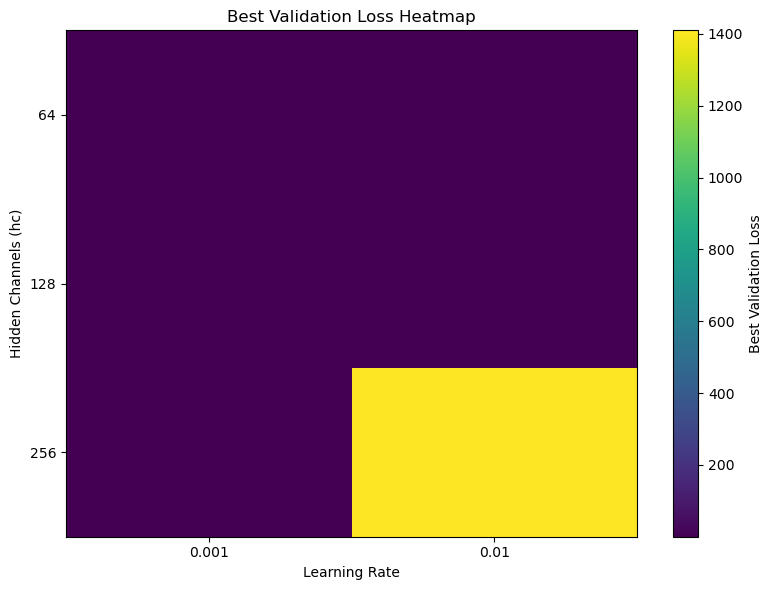

Grid search complete!
Best validation losses map:
 [[1.39036490e-01 1.52673263e-01]
 [1.36701421e-01 1.53047985e-01]
 [1.39333141e-01 1.41005957e+03]]


In [47]:
# ==== Plot a heatmap of the best validation losses ====
plt.figure(figsize=(8, 6))
# 'origin="lower"' can be used if you want the (0,0) in bottom-left corner
im = plt.imshow(best_val_losses_map, cmap="viridis", aspect="auto")
plt.colorbar(im, label='Best Validation Loss')
plt.xticks(range(len(lrs)), [str(lr) for lr in lrs])
plt.yticks(range(len(hcs)), [str(hc) for hc in hcs])
plt.xlabel("Learning Rate")
plt.ylabel("Hidden Channels (hc)")
plt.title("Best Validation Loss Heatmap")
plt.tight_layout()
heatmap_filename = f"best_val_loss_heatmap_{datetime.now().strftime('%y%m%d-%H%M%S')}.png"
plt.savefig(heatmap_filename)
plt.show()

print("Grid search complete!")
print("Best validation losses map:\n", best_val_losses_map)

In [ ]:
# # Training loop
# num_epochs = 100
# for epoch in range(num_epochs):
#     train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device, epoch, report_freq=256, save_after_batch=False, save_path=save_path)
#     
#     val_loss = evaluate(model, val_loader, criterion, device)
# 
#     # Print progress for each epoch
#     print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.8f}")
# 
#     # Save losses for plotting
#     train_losses.append(train_loss)
#     val_losses.append(val_loss)
# 
#     # Step the scheduler
#     scheduler.step(val_loss)
# 
# timestamp = datetime.now().strftime('%y%m%d-%H%M%S')
# # Plot the losses
# plt.figure()
# plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
# plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss over Epochs')
# plt.legend()
# plt.grid(True)
# plt.yscale('log')  # Set the y-axis to log scale
# plt.savefig(f'loss_plot_{timestamp}.png')  # Save the plot as a PNG file
# plt.show()  # Display the plot

In [34]:
# Save the model weights at the end of training
# save_model(model, save_path)
save_path_posttraining = f'{save_path[:-4]}_e{len(train_losses)}.pth'
save_model(model, save_path_posttraining)
print(f"Saved model weights to {save_path_posttraining}")

Saved model weights to ./model_weights_hc256_lr1e-03_wd1e-05_ss10_gamma1e-01_e120.pth


In [35]:
# Load older model weights
# load_path = './model_weights_e101.pth'
# load_model(model, load_path)

IndexError: index 2 is out of bounds for dimension 0 with size 2

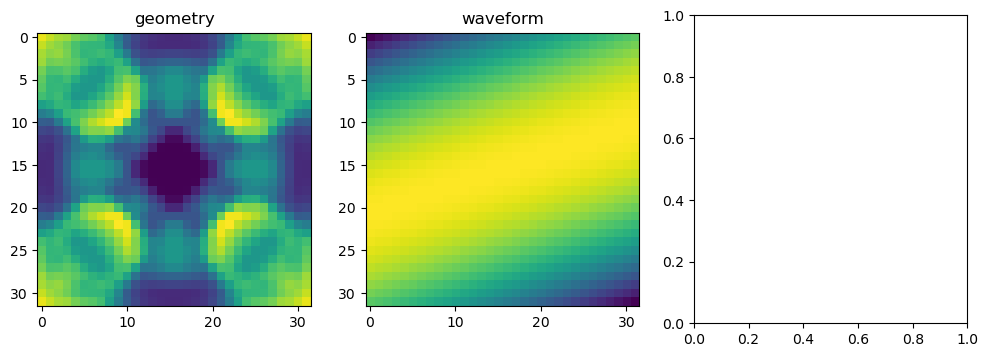

In [36]:
# Get a batch from the validation loader
inputs, targets = next(iter(val_loader))
inputs, targets = inputs.to(device), targets.to(device)

# Get a single sample from the batch
input_sample = inputs[36]
target_sample = targets[36]

# Run the model to get predictions
model.eval()
with torch.no_grad():
    output_sample = model(input_sample.unsqueeze(0)).squeeze(0)

# Plot the inputs, predictions, and targets
plot_predictions_and_targets(input_sample, output_sample, target_sample)


In [39]:
def plot_model_weights_histogram(model, log_scale=False, print_analytics=False):
    """
    Plots a histogram of the weight values of a given model.
    
    Parameters:
        model: The model object (e.g., PyTorch or TensorFlow model).
        log_scale (bool): If True, the y-axis of the histogram is set to logarithmic scale.
        print_analytics (bool): If True, prints the mean, standard deviation, and total number of weights.
    """
    # Extract all weight values
    weights = []

    # For PyTorch model
    if hasattr(model, "parameters"):
        for param in model.parameters():
            if param.requires_grad:  # Focus only on trainable parameters
                weights.append(param.data.cpu().numpy().flatten())

    # For TensorFlow/Keras model
    elif hasattr(model, "trainable_weights"):
        for layer_weights in model.trainable_weights:
            weights.append(layer_weights.numpy().flatten())

    else:
        raise ValueError("Unsupported model type. The model must be a PyTorch or TensorFlow model.")

    # Flatten and concatenate all weights into a single array
    all_weights = np.concatenate(weights)

    # Print analytics if the flag is set
    if print_analytics:
        mean = np.mean(all_weights)
        std_dev = np.std(all_weights)
        total_weights = all_weights.size
        print(f"Model Weight Analytics:")
        print(f"  Mean: {mean:.4f}")
        print(f"  Standard Deviation: {std_dev:.4f}")
        print(f"  Total Number of Weights: {total_weights}")

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(all_weights, bins=100, alpha=0.75, color='blue', edgecolor='black')
    plt.title("Histogram of Model Weight Values")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")

    if log_scale:
        plt.yscale('log')  # Set y-axis to logarithmic scale
        plt.ylabel("Frequency (log scale)")

    plt.grid(axis='y', alpha=0.75)
    plt.show()

Model Weight Analytics:
  Mean: 0.0011
  Standard Deviation: 0.2514
  Total Number of Weights: 285609220


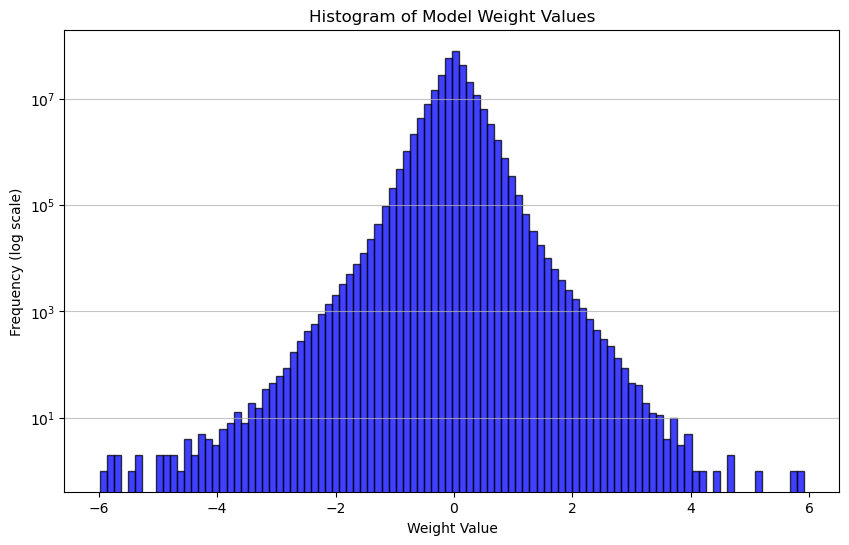

In [40]:
plot_model_weights_histogram(model, log_scale=True, print_analytics=True)

In [41]:
initialized_model = FourierNeuralOperator(modes_height=design_res, modes_width=design_res, in_channels=3, out_channels=4, hidden=hc).to(device)

Model Weight Analytics:
  Mean: 0.0000
  Standard Deviation: 0.0442
  Total Number of Weights: 285609476


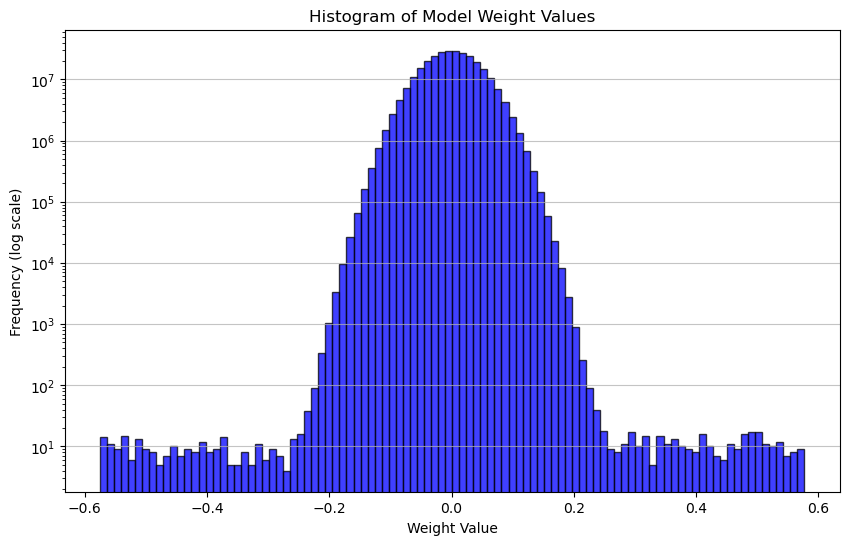

In [42]:
plot_model_weights_histogram(initialized_model, log_scale=True, print_analytics=True)

In [53]:
def process_dataloader(model, dataloader, save_folder, split_name, device='cpu', prefix=""):
    """
    Process a single dataloader, generate predictions, and save predictions, targets, and inputs.

    Parameters:
    - model: Trained PyTorch model.
    - dataloader: DataLoader to process.
    - save_folder: Path to save the output files.
    - split_name: Identifier for the dataset split (e.g., 'train', 'validation', or 'test').
    - device: Device to run the model on ('cpu' or 'cuda').
    - prefix: String to prefix the file names with.
    """
    all_predictions, all_targets, all_inputs = [], [], []

    # Ensure the model is in evaluation mode
    model.eval()
    model.to(device)

    with torch.no_grad():
        for batch in dataloader:
            # Assuming dataloader returns (inputs, targets)
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)

            # Generate predictions
            predictions = model(inputs)

            # Store inputs, targets, and predictions
            all_predictions.append(predictions.cpu())
            all_targets.append(targets.cpu())
            all_inputs.append(inputs.cpu())

    # Concatenate all batches into single tensors
    all_predictions = torch.cat(all_predictions, dim=0)
    all_targets = torch.cat(all_targets, dim=0)
    all_inputs = torch.cat(all_inputs, dim=0)

    # Save tensors to files
    os.makedirs(save_folder, exist_ok=True)
    torch.save(all_predictions, os.path.join(save_folder, f"{prefix}{split_name}_predictions.pt"))
    torch.save(all_targets, os.path.join(save_folder, f"{prefix}{split_name}_targets.pt"))
    torch.save(all_inputs, os.path.join(save_folder, f"{prefix}{split_name}_inputs.pt"))

    print(f"Saved {split_name} predictions, targets, and inputs to {save_folder}")


def save_predictions(model, train_loader, val_loader, test_loader, save_folder, device='cpu', prefix="", combine_datasets=False):
    """
    Generate predictions for train, validation, and test datasets, or their combination, and save them to files.

    Parameters:
    - model: Trained PyTorch model.
    - train_loader: DataLoader for the training dataset.
    - val_loader: DataLoader for the validation dataset.
    - test_loader: DataLoader for the test dataset.
    - save_folder: Path to save the output files.
    - device: Device to run the model on ('cpu' or 'cuda').
    - prefix: String to prefix the file names with.
    - combine_datasets (bool): If True, combine all datasets before processing.
    """
    if combine_datasets:
        print("Combining training, validation, and test datasets...")
        combined_dataset = ConcatDataset([
            train_loader.dataset,
            val_loader.dataset,
            test_loader.dataset
        ])
        combined_loader = DataLoader(combined_dataset, batch_size=train_loader.batch_size, shuffle=False)
        process_dataloader(model, combined_loader, save_folder, "combined", device=device, prefix=prefix)
    else:
        # Process train, validation, and test loaders separately
        process_dataloader(model, train_loader, save_folder, "train", device=device, prefix=prefix)
        process_dataloader(model, val_loader, save_folder, "validation", device=device, prefix=prefix)
        process_dataloader(model, test_loader, save_folder, "test", device=device, prefix=prefix)

In [ ]:
save_predictions(model, train_loader, val_loader, test_loader, "prediction target datasets", device='cuda', prefix="hc256_250107_")

In [32]:
def save_sample_predictions(sample_num, interval, filename_suffix, file_path, model, val_loader, device, start_sample=0, plot_preview=False):
    # Ensure the directory exists, create if not
    os.makedirs(file_path, exist_ok=True)

    # Get a batch from the validation loader
    inputs, targets = next(iter(val_loader))
    inputs, targets = inputs.to(device), targets.to(device)

    # Loop through the samples based on sample_num
    for i in range(sample_num):
        # Calculate the current sample index based on start_sample and interval
        current_sample = start_sample + i * interval

        # Make sure the current sample index is within bounds
        if current_sample >= len(inputs):
            print(f"Sample index {current_sample} exceeds the number of available samples. Stopping loop.")
            break

        # Extract the current sample for inputs and targets
        input_sample = inputs[current_sample]
        target_sample = targets[current_sample]

        # Run the model to get predictions
        model.eval()
        with torch.no_grad():
            output_sample = model(input_sample.unsqueeze(0)).squeeze(0)

        # Generate the file suffix for this specific sample
        file_suffix = f'sample{i+1}_{filename_suffix}'

        # Plot and save the inputs, predictions, and targets using the new functionality
        plot_predictions_and_targets(
            input_sample,
            output_sample,
            target_sample,
            save=True,                   # Save the plots
            save_dir=file_path,           # Directory to save the plots
            file_suffix=file_suffix       # Suffix to make filenames unique
        )

        # Optionally preview the plots if plot_preview is True
        if plot_preview:
            plot_predictions_and_targets(
                input_sample,
                output_sample,
                target_sample,
                save=False                 # Only display the plots
            )

        print(f'Saved sample {i+1} with suffix {file_suffix} in {file_path}')


In [ ]:
figure_folder = 'figures/hc128'
figure_suffix = f'hc{hc}_lr{lr:.0e}_wd{wd:.0e}_ss{ss}_gamma{gamma:.0e}'
save_sample_predictions(16, 8, figure_suffix, figure_folder, model, val_loader, device)
